# <p style="background-color:pink;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>NLP - MACHINE LEARNING  </b></p>
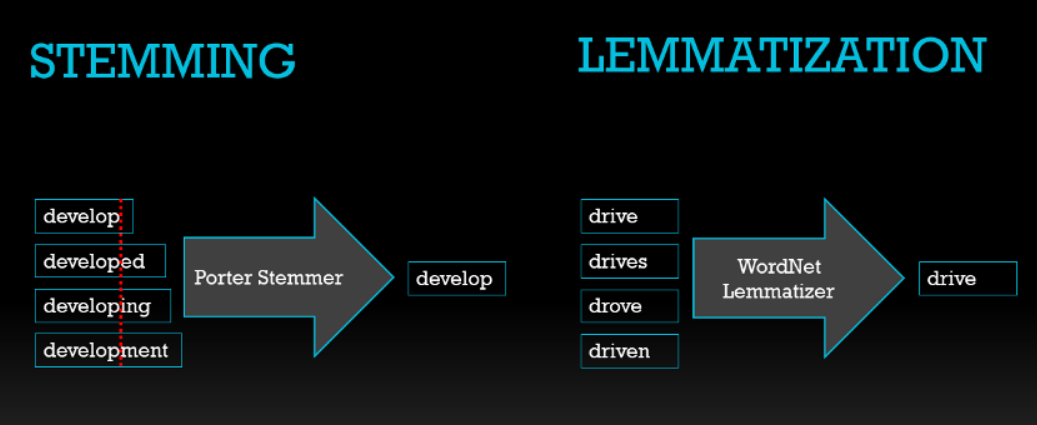
[Mywebsite] (https://www.yagmurana.info/) |           
[YouTube] (https://www.youtube.com/@NazlnazanAvc) |          
[LinkedIn] (https://www.linkedin.com/in/nazl%C4%B1-nazli-avci/ ) |      
[Github]  (https://github.com/avcinazlinazan) <br>
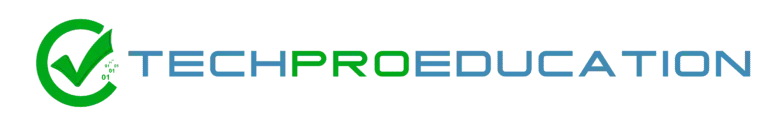

# NLP Application with ML

## Classification of Tweets Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)

In [6]:
df = pd.read_csv("Product.csv")
df.head()

productType                                        productLink  \
0          HP  https://www.trendyol.com//hp/250-g8-core-i5-11...   
1      Casper  https://www.trendyol.com//casper/nirvana-x600-...   
2        Dell  https://www.trendyol.com//dell/vostro-3520-i5-...   
3      Casper  https://www.trendyol.com//casper/excalibur-g87...   
4      Casper  https://www.trendyol.com//casper/nirvana-c370-...   

   productPrice                                        productInfo  \
0       10999.0  250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...   
1       12599.0   Nirvana X600.139H-DF00X-G-F Intel Core i7-113...   
2       33999.0  Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6" Fh...   
3       16299.0  Excalibur G870.1265-DFA0X-B Intel Core i7-1265...   
4        6999.0  Nirvana C370.4020-4C00B Intel Celeron N4020 4G...   

  productName                                       product_Info  
0      Laptop  250 G8Core I51135G7 lemci 8GB Ram 256GB SSD 15...  
1      Laptop  Nirvana X600139HDF00XGF Intel Core i711390H 32...  
2      Laptop  Vostro 3520 I51135G7 8 GB 256 GB SSD 156 Fhd F...  
3      Laptop  Excalibur G8701265DFA0XB Intel Core i712650H 3...  
4      Laptop  Nirvana C37040204C00B Intel Celeron N4020 4GB ...

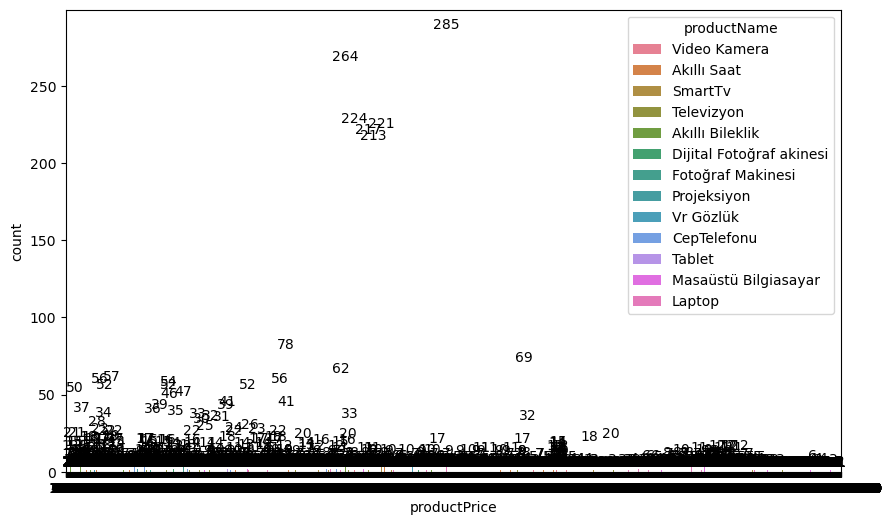

In [8]:
ax = sns.countplot(data = df, x ="productPrice", hue = "productName")
for p in ax.containers:
    ax.bar_label(p)

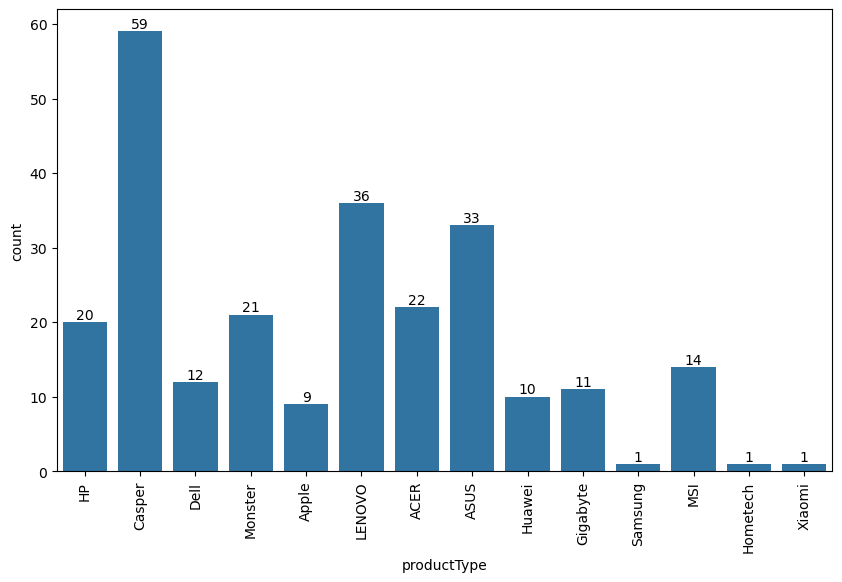

In [18]:
ax = sns.countplot(data =df[:250], x ="productType")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

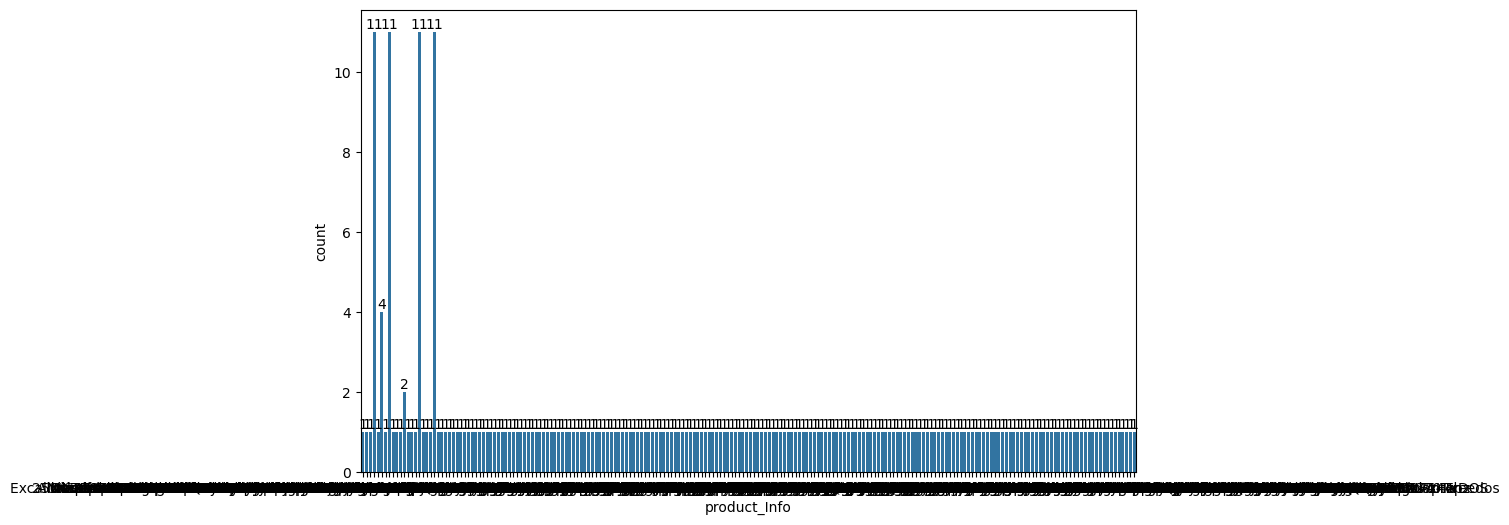

In [22]:
ax = sns.countplot(data =df[:250], x = "product_Info")
ax.bar_label(ax.containers[0]);

In [26]:
df["productName"].value_counts()

productName
Laptop                      4941
Masaüstü Bilgiasayar        3556
CepTelefonu                 2582
Akıllı Saat                 2176
Televizyon                  1507
Video Kamera                1427
SmartTv                     1200
Fotoğraf Makinesi           1169
Dijital Fotoğraf akinesi    1167
Akıllı Bileklik              917
Projeksiyon                  435
Tablet                       414
Vr Gözlük                    288
Name: count, dtype: int64

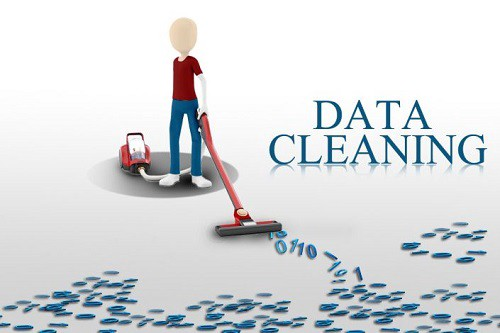

## Cleaning Data

In [28]:
df2 = df.copy()

In [30]:
df2["product_Info"].head()

0    250 G8Core I51135G7 lemci 8GB Ram 256GB SSD 15...
1    Nirvana X600139HDF00XGF Intel Core i711390H 32...
2    Vostro 3520 I51135G7 8 GB 256 GB SSD 156 Fhd F...
3    Excalibur G8701265DFA0XB Intel Core i712650H 3...
4    Nirvana C37040204C00B Intel Celeron N4020 4GB ...
Name: product_Info, dtype: object

## Cleaning Data


"re" Python programlama dilinde yer alan "regular expression" (düzenli ifadeler) işlemlerini gerçekleştirmek için kullanılan bir modüldür. "re" modülü, metinlerde belirli desenleri aramak, eşleşen desenleri değiştirmek, desenlere dayalı metin manipülasyonu yapmak gibi çeşitli işlemleri gerçekleştirmek için kullanılır.

Regular expression'lar, metinlerde desenleri tanımlayan ve bu desenlere uygun olan kısımları bulmayı veya değiştirmeyi sağlayan karakter dizileridir. Örneğin, bir metindeki tüm e-posta adreslerini bulmak veya bir metindeki belirli bir deseni değiştirmek gibi işlemler "re" modülü kullanılarak gerçekleştirilebilir.

"re" modülü, "re.sub()" gibi birçok işlevi içerir. Bu işlevler, desen eşleşmelerini bulmayı ve değiştirmeyi sağlar. Ayrıca "re.search()", "re.match()", "re.findall()" gibi işlevler de bulunan desenleri aramak veya eşleşen desenleri elde etmek için kullanılabilir.

Düzenli ifadeler, metinlerde desenleri tanımlarken özel karakterler ve belirteçler kullanır. Örneğin, "\d" sayı karakterlerini temsil ederken, "\w" kelime karakterlerini temsil eder. Bu özel karakterler ve belirteçler ile daha karmaşık desenler tanımlanabilir.

"re" modülü, metin işleme, metin analizi, veri temizleme ve doğrulama gibi birçok alanda kullanılabilir. Düzenli ifadeleri anlamak ve kullanmak, metin işleme ve analizi için güçlü bir araçtır.

In [32]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()          # http den sonra boşluk haricindekileri temizle  ("") getir..
s                                                # stip ile başındaki ve sonundaki boşlukları temizler

'#lateflight @airlines'

re.sub ile düzenli ifade kullanarak metindeki URL'leri temizle

s = re.sub("http\S+", "", s).strip()  # "http" ile başlayan ve boşluk olmayan karakterleri ("") ile değiştir

s = s.strip()  # Metnin başındaki ve sonundaki boşlukları temizle

In [34]:
s = re.sub("#\S+", "", s)                   # "#" ile başlayan ifadeyi temizle
s

' @airlines'

In [36]:
s = re.sub("@\S+", "", s)                   # "@" ile başlayan ifadeyi temizle
s.strip()

''

In [12]:
#nltk.download('stopwords')          # önceki notebook da yüklemiştik

In [13]:
#nltk.download('wordnet')

In [38]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:            # sentiment analizde "not" ve "no" veri de yer almalı. bu iki ifadeyi stop words den çıkarıyoruz   
        stop_words.remove(i)

In [40]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")    #don't gibi ifadeleri ' dan kurtarmış oluyoruz.
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [42]:
cleaning_text = df2["product_Info"].apply(cleaning)       #cleaning fonksiyonumu apply ile tüm text ime uyguluyorum
cleaning_text.head()

0      lemci ram ssd fhd freedos laptop kmr grisi
1      nirvana intel core gb ram nvme ssd freedos
2                    vostro gb gb ssd fhd freedos
3       excalibur intel core ram nvme ssd freedos
4    nirvana intel celeron ram ssd window home hd
Name: product_Info, dtype: object

## Features and Label

In [43]:
df2 =df2[["productName", "product_Info"]]
df2.head()

productName                                       product_Info
0      Laptop  250 G8Core I51135G7 lemci 8GB Ram 256GB SSD 15...
1      Laptop  Nirvana X600139HDF00XGF Intel Core i711390H 32...
2      Laptop  Vostro 3520 I51135G7 8 GB 256 GB SSD 156 Fhd F...
3      Laptop  Excalibur G8701265DFA0XB Intel Core i712650H 3...
4      Laptop  Nirvana C37040204C00B Intel Celeron N4020 4GB ...

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X = df2["product_Info"]
y= df2["productName"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

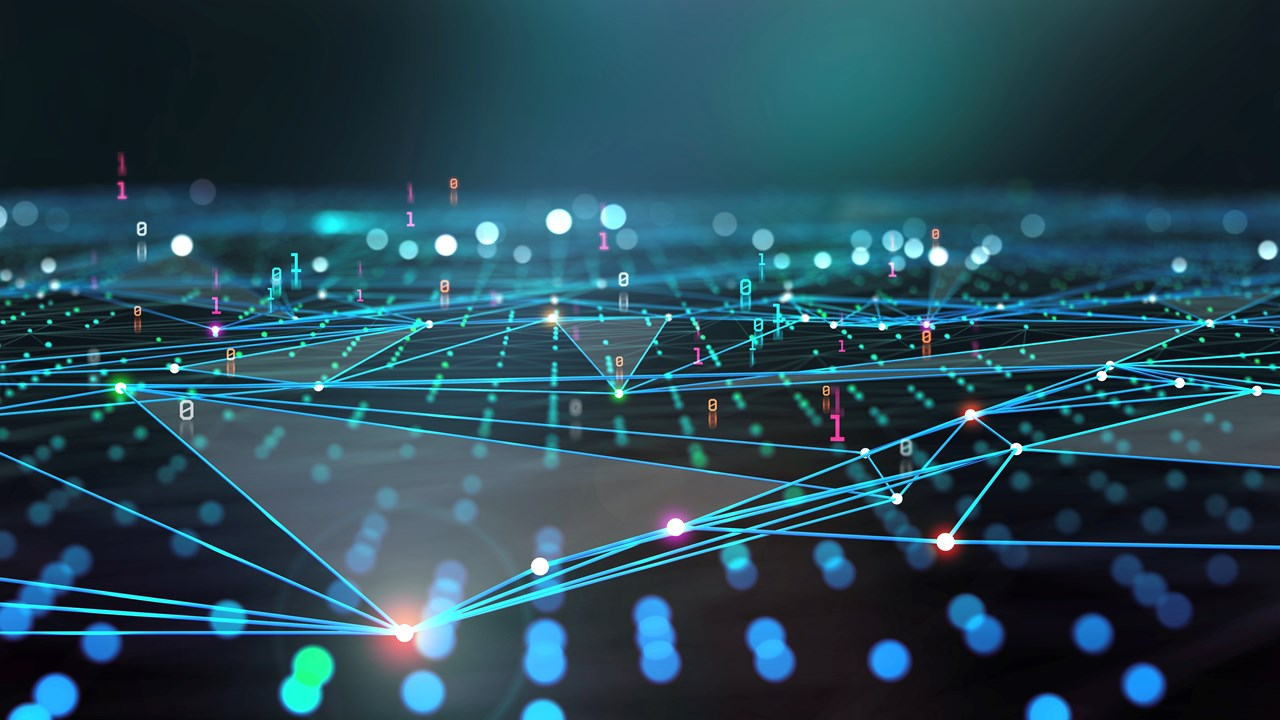

## Vectorization

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # min_df= 3 (Corpus umda 3 ya da daha az olanları ignore et)
X_train_count = vectorizer.fit_transform(X_train)         
X_test_count = vectorizer.transform(X_test)          

In [55]:
# Data "preprocessor=cleaning" sayesinde cleaning fonksiyonu çağrılarak temizlendi

In [56]:
X_train_count

<17423x1814 sparse matrix of type '<class 'numpy.int64'>'
	with 113299 stored elements in Compressed Sparse Row format>

In [57]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aba  abra  acer  acl  active  adal  adam  adaptor  adaptr  adet  \
0        0     0     0    0       0     0     0        0       0     0   
1        0     0     0    0       0     0     0        0       0     0   
2        0     0     0    0       0     0     0        0       0     0   
3        0     0     0    0       0     0     0        0       0     0   
4        0     0     0    0       0     0     0        0       0     0   
...    ...   ...   ...  ...     ...   ...   ...      ...     ...   ...   
17418    0     0     0    0       0     0     0        0       0     0   
17419    0     0     0    0       0     0     0        0       0     0   
17420    0     0     0    0       0     0     0        0       0     0   
17421    0     0     0    0       0     0     0        0       0     0   
17422    0     0     0    0       0     0     0        0       0     0   

       adimsayar  adiniza  adipa  adm  admsayar  adnza  adventure  aero  ahd  \
0              0        0      0    0         0      0          0     0    0   
1              0        0      0    0         0      0          0     0    0   
2              0        0      0    0         0      0          0     0    0   
3              0        0      0    0         0      0          0     0    0   
4              0        0      0    0         0      0          0     0    0   
...          ...      ...    ...  ...       ...    ...        ...   ...  ...   
17418          0        0      0    0         0      0          0     0    0   
17419          0        0      0    0         0      0          0     0    0   
17420          0        0      0    0         0      0          0     0    0   
17421          0        0      0    0         0      0          0     0    0   
17422          0        0      0    0         0      0          0     0    0   

       aik  air  airfryer  airpods  airtag  aizen  ak  akilli  akl  akll  \
0        0    0         0        0       0      0   0       0    0     0   
1        0    0         0        0       0      0   0       0    0     0   
2        0    0         0        0       0      0   0       0    0     0   
3        0    0         0        0       0      0   0       0    0     0   
4        0    0         0        0       0      0   0       0    0     0   
...    ...  ...       ...      ...     ...    ...  ..     ...  ...   ...   
17418    0    0         0        0       0      0   0       0    0     0   
17419    0    0         0        0       0      0   0       0    0     0   
17420    0    0         0        0       0      0   0       0    0     0   
17421    0    0         0        0       0      0   0       0    0     0   
17422    0    0         0        0       0      0   0       0    0     0   

       aklll  akllsaatbileklik  aklltelefon  akmak  akordiyon  aksesuar  \
0          0                 0            0      0          0         0   
1          0                 0            0      0          0         0   
2          0                 0            0      0          0         0   
3          0                 0            0      0          0         0   
4          0                 0            0      0          0         0   
...      ...               ...          ...    ...        ...       ...   
17418      0                 0            0      0          0         0   
17419      0                 0            0      0          0         0   
17420      0                 0            0      0          0         0   
17421      0                 0            0      0          0         0   
17422      0                 0            0      0          0         0   

       aksesuarl  aksesuarsz  aksiyon  aktf  aktif  aktivite  al  alabilen  \
0              0           0        0     0      0         0   0         0   
1              0           0        0     0      0         0   0         0   
2              0           0        0     0      0         0   0         0   
3              0           0   

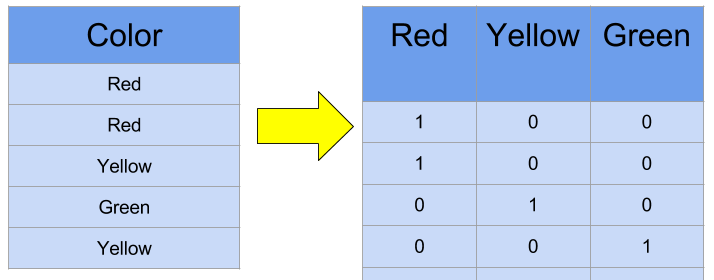

## Model Comparisons - Vectorization

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [66]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

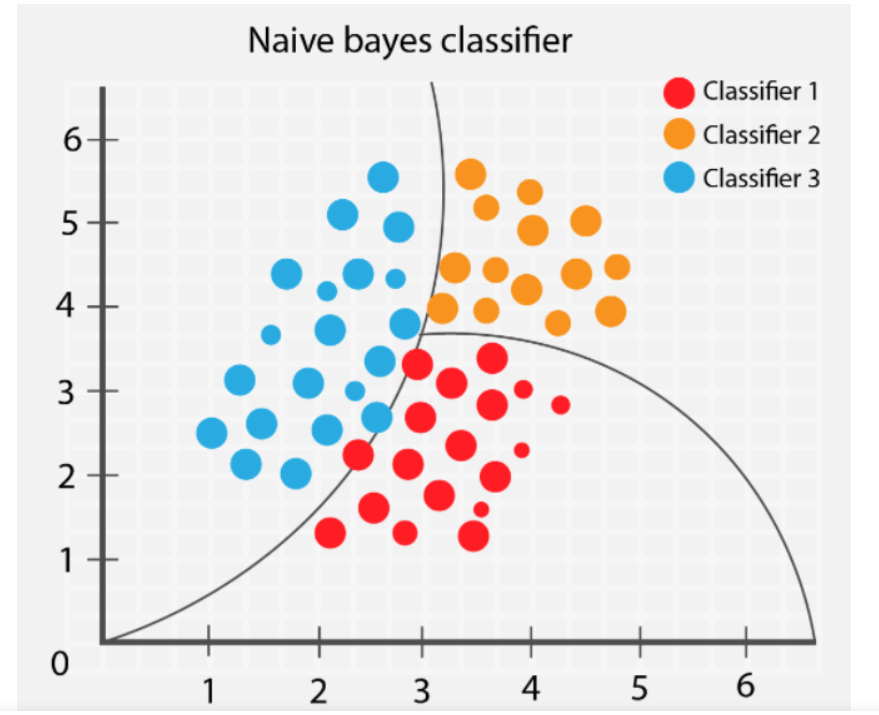

In [68]:
y_train

13584    Masaüstü Bilgiasayar
18998              Televizyon
15503    Masaüstü Bilgiasayar
15527    Masaüstü Bilgiasayar
9781              CepTelefonu
                 ...         
20294            Video Kamera
19071              Televizyon
19714              Televizyon
3315                   Laptop
17189                 SmartTv
Name: productName, Length: 17423, dtype: object

In [70]:
y_train.unique()

array(['Masaüstü Bilgiasayar', 'Televizyon', 'CepTelefonu', 'Laptop',
       'Dijital Fotoğraf akinesi', 'Akıllı Saat', 'Tablet', 'SmartTv',
       'Akıllı Bileklik', 'Projeksiyon', 'Video Kamera',
       'Fotoğraf Makinesi', 'Vr Gözlük'], dtype=object)

## Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [75]:
nb = MultinomialNB(alpha=3)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=3)

In [77]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[128  48   3   0   1   0   0   1   0   0   0   2   0]
 [ 17 389   6   1   1   9   0   1   1   0   5   5   0]
 [  0   4 507   0   2   2   0   1   0   0   0   1   0]
 [  0   1   4  80 142   0   2   0   0   0   1   3   0]
 [  0   0   2 144  82   1   0   1   0   0   2   2   0]
 [  0   1   1   0   0 970  14   0   0   1   0   1   0]
 [  1   0   0   0   0  57 653   0   0   0   0   0   0]
 [  0   1   1   1   0   2   0  76   1   1   4   0   0]
 [  1   1   0   0   1   6   1   1   3   1 219   6   0]
 [  1   0   4   1   0   2   3   0   0  71   0   1   0]
 [  1   1   0   0   0  10   2   1  27   2 251   7   0]
 [  0   2   1   9  14   5   0   1   1   0   4 247   1]
 [  2   0   0   0   0   0   0   0   0   0   0   0  56]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.85      0.70      0.77       183
             Akıllı Saat       0.87      0.89      0.88       435
             CepTelefonu       0.96      0.98      0.97       517
D

In [93]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["Laptop"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["Laptop"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["Laptop"])}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.810539
test_precision-neg    0.925890
test_recall-neg       0.986086
test_f1-neg           0.954974
dtype: float64

In [81]:
!pip install yellowbrick

Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


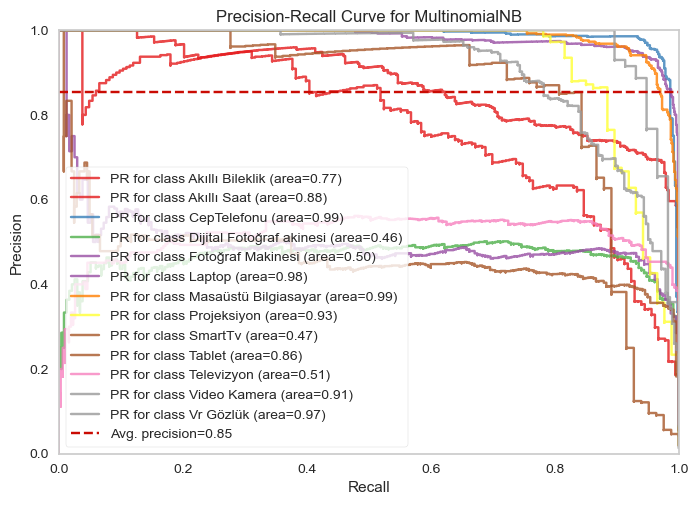

In [95]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

Precision ve recall, özellikle dengesiz veri setlerinde modelin performansını anlamak için önemlidir.

Bu grafikten Sınıfların model üzerinde ki etkisini ayrı ayrı görüyoruz (unbalance dağılımın etkside yansıyor)

Precision, pozitif olarak tahmin edilen örnekler arasında gerçekten pozitif olanların oranını gösterirken, recall (geri çağırma) gerçekte pozitif olan örneklerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir.

Precision ve recall arasında bir trade-off (değiş tokuş) ilişkisi vardır.

Precision-recall eğrisi, bu trade-off ilişkisini görselleştirmek için kullanılır. Bu eğri, farklı kesme noktalarında modelin precision ve recall değerlerini gösterir. Optimum performans genellikle yeterince yüksek precision ve recall değerlerini sağlayan bir kesme noktası seçilerek elde edilir. 

In [97]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
nb_AP_neg = viz.score_["Laptop"]

Yukarıda model performansını kaydediyoruz ki en son tüm modelleri karşılaştıralım

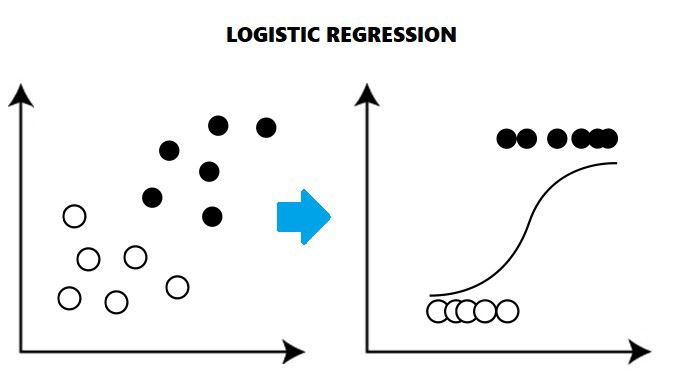

## Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [100]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[117  53   7   0   0   0   0   0   1   0   1   4   0]
 [ 11 387   7   0   0   4   1   0   2   0   8  15   0]
 [  0   5 503   0   0   2   1   0   0   0   0   6   0]
 [  0   0   1  89 115   2   0   0   0   0   2  24   0]
 [  0   0   4 133  79   0   0   0   0   0   4  14   0]
 [  0   1   1   0   0 961  24   0   0   0   0   1   0]
 [  0   0   2   0   0  66 640   0   0   0   0   3   0]
 [  0   1   1   0   0   4   0  70   1   0   5   5   0]
 [  0   0   0   0   1   1   1   0  15   1 206  15   0]
 [  0   1   5   1   0   4   1   0   0  63   2   6   0]
 [  0   0   1   0   0   2   4   0  20   2 257  16   0]
 [  0   0   0   6   7   0   2   0   0   0   6 264   0]
 [  1   2   1   0   0   2   0   0   0   0   1   1  50]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.91      0.64      0.75       183
             Akıllı Saat       0.86      0.89      0.87       435
             CepTelefonu       0.94      0.97      0.96       517


In [103]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.801871
test_precision-neg    0.930053
test_recall-neg       0.972419
test_f1-neg           0.950643
dtype: float64

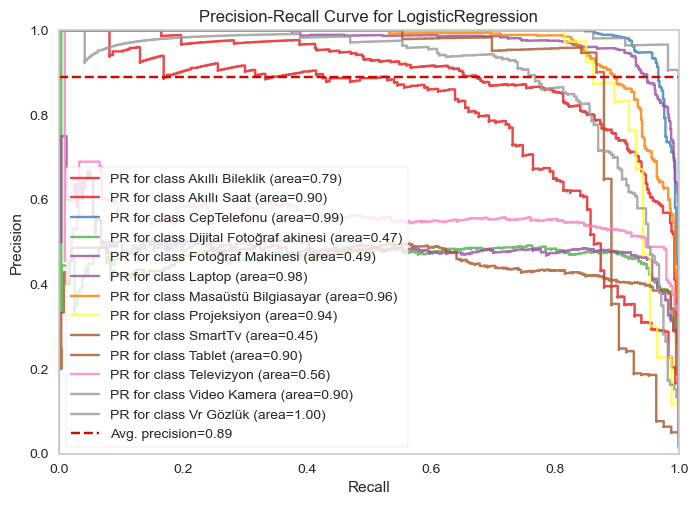

In [105]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [107]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
log_AP_neg = viz.score_["Laptop"]

In [109]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [111]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[143  29   1   0   0   0   0   2   0   1   0   6   1]
 [ 29 368   3   0   0   0   0   1   1   6   8  19   0]
 [  3   2 500   0   0   0   0   1   0   6   0   5   0]
 [  0   0   0  84 127   0   0   0   0   0   2  20   0]
 [  0   0   2 136  82   0   0   1   0   1   4   8   0]
 [  0   0   4   0   0 927  42   0   0   5   1   9   0]
 [  1   0   3   0   0  55 635   0   0   1   0  16   0]
 [  1   0   0   1   0   0   0  81   0   0   2   2   0]
 [  0   0   0   0   1   0   1   1 141   1  79  16   0]
 [  0   0   0   1   0   0   1   0   1  77   1   2   0]
 [  0   0   1   0   0   1   2   0 161   2 115  20   0]
 [  0   0   0   7   8   0   0   2   1   0   4 262   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  58]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.81      0.78      0.79       183
             Akıllı Saat       0.92      0.85      0.88       435
             CepTelefonu       0.97      0.97      0.97  

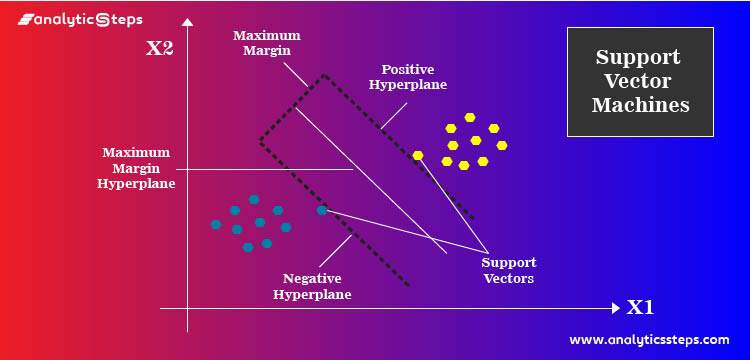

## SVM

In [113]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [115]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[126  46   7   0   0   0   0   0   0   0   1   2   1]
 [ 13 399   5   0   0   0   0   1   0   0  12   5   0]
 [  0   3 508   0   0   1   1   0   0   0   1   3   0]
 [  0   0   1  83 132   0   1   0   0   0   5  11   0]
 [  0   1   2 146  70   0   0   0   0   0   5  10   0]
 [  0   1   0   0   0 968  18   0   0   0   1   0   0]
 [  0   0   1   0   0  40 668   0   0   0   2   0   0]
 [  0   0   0   1   0   1   0  81   0   0   3   1   0]
 [  0   1   0   0   1   1   1   0  16   1 218   1   0]
 [  0   1   2   0   0   3   1   0   0  73   2   1   0]
 [  0   3   1   0   0   1   4   0  42   2 247   2   0]
 [  0   1   0   6   5   0   2   0   1   0  10 259   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  58]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.91      0.69      0.78       183
             Akıllı Saat       0.88      0.92      0.90       435
             CepTelefonu       0.96      0.98      0.97       517


In [117]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.819033
test_precision-neg    0.962637
test_recall-neg       0.980520
test_f1-neg           0.971438
dtype: float64

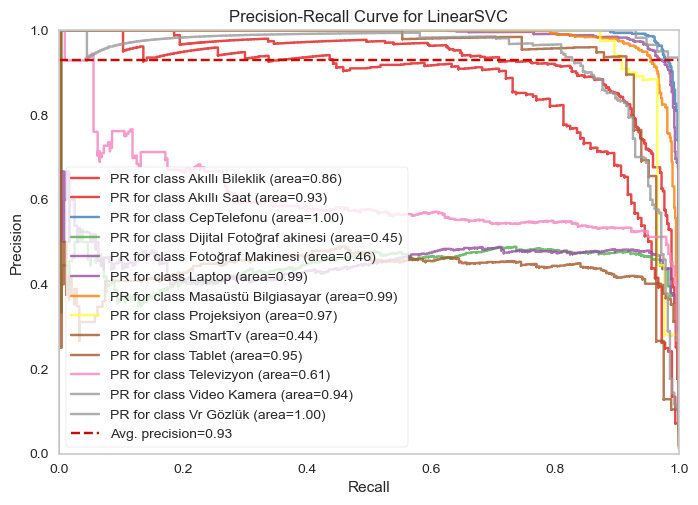

In [118]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [121]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
svc_AP_neg = viz.score_["Laptop"]

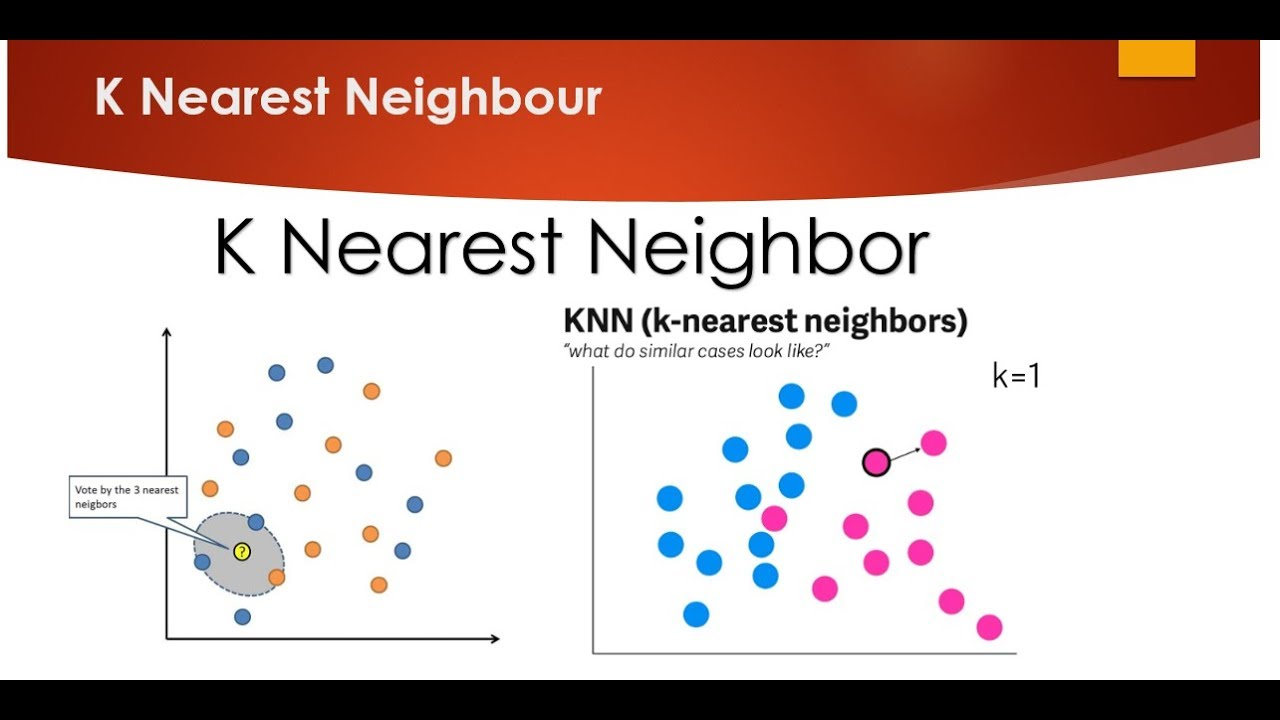

## KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [125]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[152  23   1   0   0   0   0   0   4   0   3   0   0]
 [ 23 393   2   0   0   0   0   0   5   0   9   3   0]
 [  0   5 501   0   0   0   0   0   5   0   4   2   0]
 [  0   2   1  66 149   0   0   0   2   0   7   6   0]
 [  0   2   2 130  84   0   0   0   1   0   6   9   0]
 [  0   3   2   0   0 934  39   0   4   0   6   0   0]
 [  0   2   1   0   0  26 673   0   4   0   5   0   0]
 [  0   2   2   0   1   0   0  71   3   0   6   2   0]
 [  0   7   1   0   0   0   0   0  66   1 164   1   0]
 [  0   1   5   0   0   1   1   1   2  67   5   0   0]
 [  0  14   3   0   1   0   0   0 144   2 136   2   0]
 [  0  10   2   2   6   0   0   1  14   0  13 237   0]
 [  0   3   1   0   0   0   0   0   1   0   0   0  53]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.87      0.83      0.85       183
             Akıllı Saat       0.84      0.90      0.87       435
             CepTelefonu       0.96      0.97      0.96       517


In [126]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.798600
test_precision-neg    0.985960
test_recall-neg       0.957496
test_f1-neg           0.971479
dtype: float64

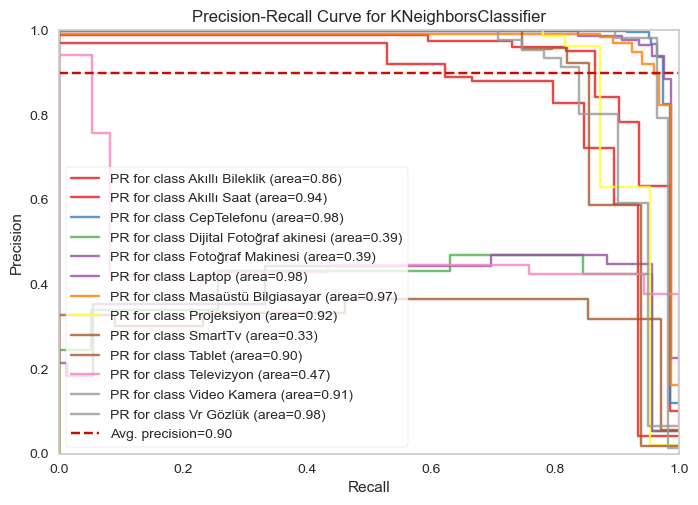

In [127]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [131]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
knn_AP_neg = viz.score_["Laptop"]

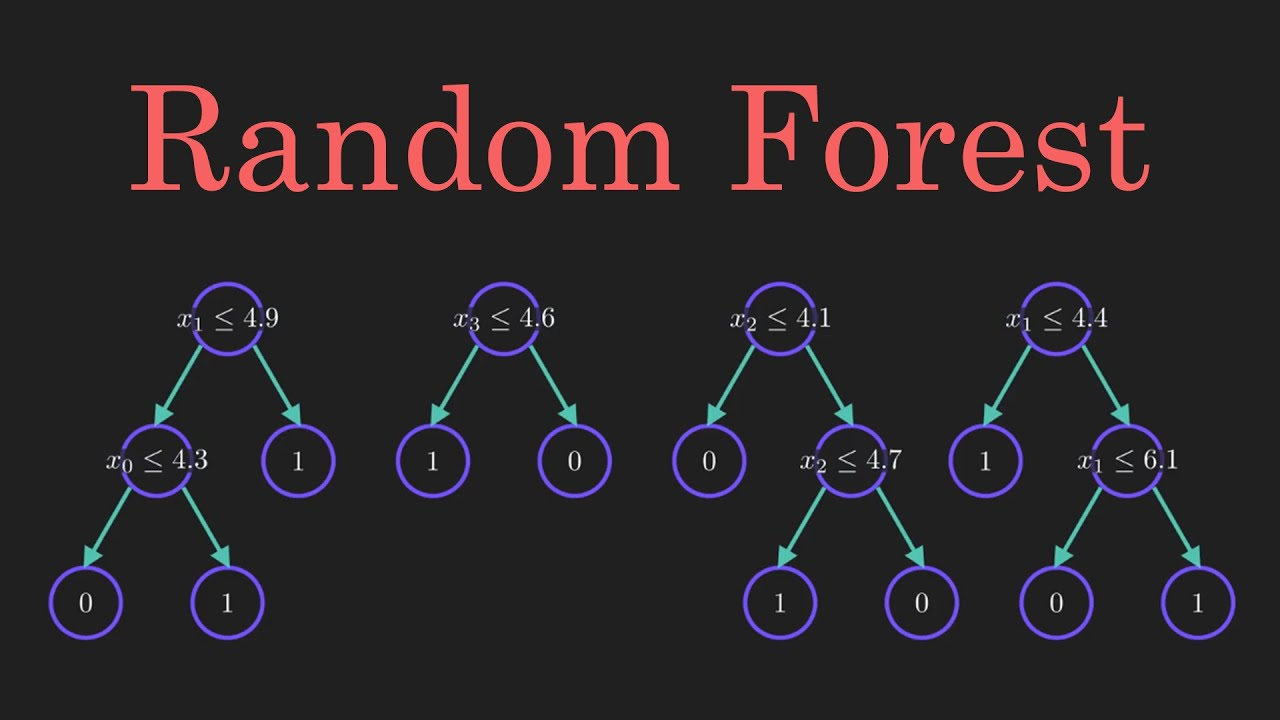

## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [134]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[140  30   5   0   1   1   0   0   0   0   0   6   0]
 [  9 398   4   0   0   1   0   0   0   0   4  19   0]
 [  0   1 508   0   0   2   0   0   0   0   0   6   0]
 [  0   0   0  51 164   0   1   0   0   0   2  15   0]
 [  0   0   1 185  33   0   0   0   0   0   3  12   0]
 [  0   0   0   0   0 976   9   0   0   0   1   2   0]
 [  0   0   1   0   0  24 681   0   0   0   2   3   0]
 [  0   0   1   0   0   2   0  75   0   0   3   6   0]
 [  0   0   0   0   0   0   1   0  20   1 197  21   0]
 [  0   0   1   0   0   1   1   0   0  74   2   4   0]
 [  0   1   0   0   0   1   3   0 122   1 149  25   0]
 [  0   2   1   6   2   1   0   0   0   0   3 269   1]
 [  0   1   0   0   0   0   0   0   0   0   0   1  56]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.94      0.77      0.84       183
             Akıllı Saat       0.92      0.91      0.92       435
             CepTelefonu       0.97      0.98      0.98       517
D

In [135]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.800493
test_precision-neg    0.979333
test_recall-neg       0.991397
test_f1-neg           0.985303
dtype: float64

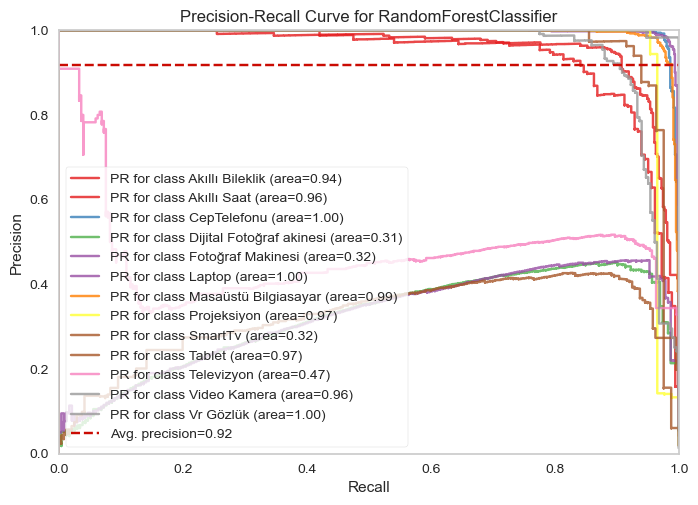

In [136]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [139]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
rf_AP_neg = viz.score_["Laptop"]

In [140]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [142]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[148  23   1   0   1   1   0   1   0   0   1   6   1]
 [ 11 394   3   0   0   0   0   0   0   1   1  25   0]
 [  0   2 505   0   0   0   0   0   0   3   0   7   0]
 [  0   0   0  51 164   0   0   0   0   0   1  17   0]
 [  0   0   1 188  33   0   0   0   0   0   1  11   0]
 [  0   0   0   0   0 962  12   0   1   4   0   9   0]
 [  0   0   0   0   0  11 687   0   0   2   0  11   0]
 [  0   0   0   0   0   0   0  81   0   0   2   4   0]
 [  0   0   0   0   0   0   1   0  91   1 119  28   0]
 [  0   0   0   0   1   0   1   0   1  78   0   2   0]
 [  0   1   0   0   0   1   2   0 201   1  66  30   0]
 [  0   0   0   4   5   0   0   0   0   1   2 272   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  58]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.93      0.81      0.87       183
             Akıllı Saat       0.94      0.91      0.92       435
             CepTelefonu       0.99      0.98      0.98   

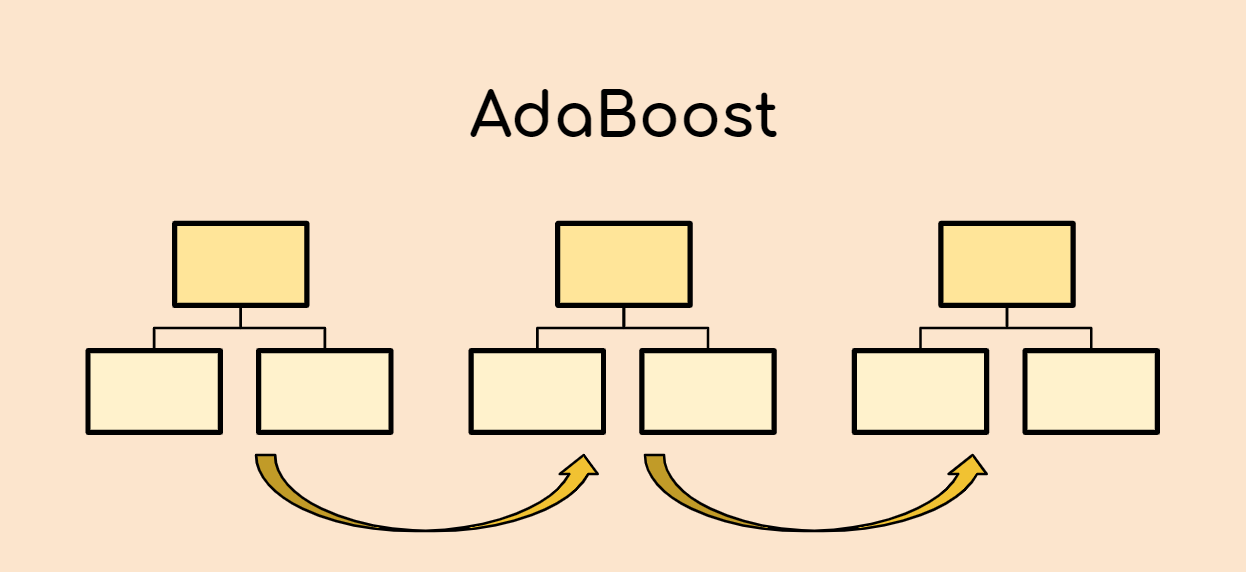

## Ada Boost

In [147]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [148]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 78  57   0   0   1   0   0   0  35   0   9   2   1]
 [ 17 321   5   0   1   0   0   0  38   9  43   1   0]
 [  4   1 336   0   0   1   0   0   0  43  14   2 116]
 [  1   0   0 172  32   0   0   0   0   2  18   7   1]
 [  0   0   0 173  24   0   0   0   0   4  16  13   4]
 [  0   0   7   0   0 825  86   0   0  51  15   0   4]
 [  0   0   0   0   0 160 464   0   0  68  19   0   0]
 [  1   0   0   0   8   0   0  67   0   2   9   0   0]
 [  0   0   0   0   0   0   1   0   0   4 234   1   0]
 [  0   4   2   2   0   0   1   0   0  70   1   3   0]
 [  1   0   0   0   0   1   3   0   1   5 289   2   0]
 [  0   0   2  15  48   0   0   0   1   8  49 159   3]
 [  0   0   0   0   0   0   0   0   1   0   0   0  57]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.76      0.43      0.55       183
             Akıllı Saat       0.84      0.74      0.78       435
             CepTelefonu       0.95      0.65      0.77       517


In [149]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.645239
test_precision-neg    0.815689
test_recall-neg       0.793802
test_f1-neg           0.796666
dtype: float64

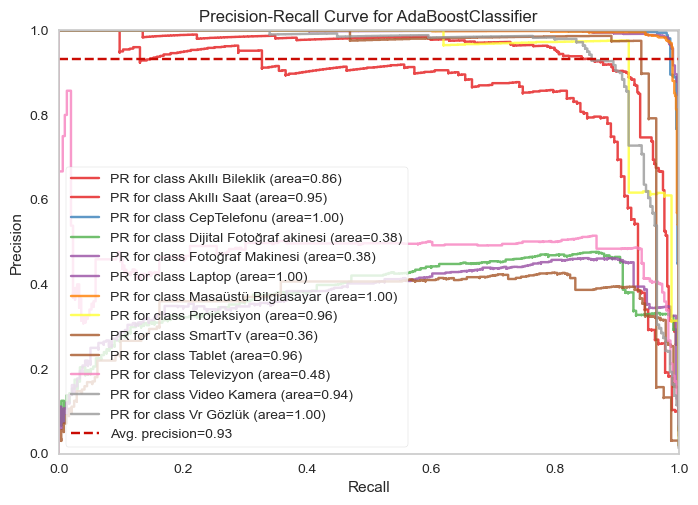

In [150]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [151]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
ada_AP_neg = viz.score_["Laptop"]

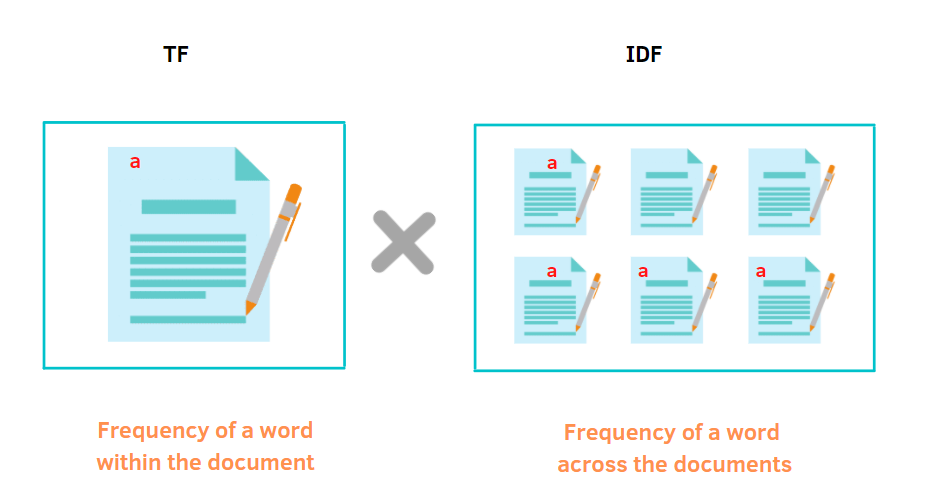

## TF-IDF

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [159]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [160]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [161]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aba  abra  acer  acl  active  adal  adam  adaptor  adaptr  adet  \
0      0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
1      0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
2      0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
3      0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
4      0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
...    ...   ...   ...  ...     ...   ...   ...      ...     ...   ...   
17418  0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
17419  0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
17420  0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
17421  0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   
17422  0.0   0.0   0.0  0.0     0.0   0.0   0.0      0.0     0.0   0.0   

       adimsayar  adiniza  adipa  adm  admsayar  adnza  adventure  aero  ahd  \
0            0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
1            0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
2            0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
3            0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
4            0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
...          ...      ...    ...  ...       ...    ...        ...   ...  ...   
17418        0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
17419        0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
17420        0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
17421        0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   
17422        0.0      0.0    0.0  0.0       0.0    0.0        0.0   0.0  0.0   

       aik  air  airfryer  airpods  airtag  aizen   ak  akilli  akl  akll  \
0      0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
1      0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
2      0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
3      0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
4      0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
...    ...  ...       ...      ...     ...    ...  ...     ...  ...   ...   
17418  0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
17419  0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
17420  0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
17421  0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   
17422  0.0  0.0       0.0      0.0     0.0    0.0  0.0     0.0  0.0   0.0   

       aklll  akllsaatbileklik  aklltelefon  akmak  akordiyon  aksesuar  \
0        0.0               0.0          0.0    0.0        0.0       0.0   
1        0.0               0.0          0.0    0.0        0.0       0.0   
2        0.0               0.0          0.0    0.0        0.0       0.0   
3        0.0               0.0          0.0    0.0        0.0       0.0   
4        0.0               0.0          0.0    0.0        0.0       0.0   
...      ...               ...          ...    ...        ...       ...   
17418    0.0               0.0          0.0    0.0        0.0       0.0   
17419    0.0               0.0          0.0    0.0        0.0       0.0   
17420    0.0               0.0          0.0    0.0        0.0       0.0   
17421    0.0               0.0          0.0    0.0        0.0       0.0   
17422    0.0               0.0          0.0    0.0        0.0       0.0   

       aksesuarl  aksesuarsz  aksiyon  aktf  aktif  aktivite   al  alabilen  \
0            0.0         0.0      0.0   0.0    0.0       0.0  0.0       0.0   
1            0.0         0.0      0.0   0.0    0.0       0.0  0.0       0.0   
2            0.0         0.0      0.0   0.0    0.0       0.0  0.0       0.0   
3            0.

## Model Comparisons  TF-IDF

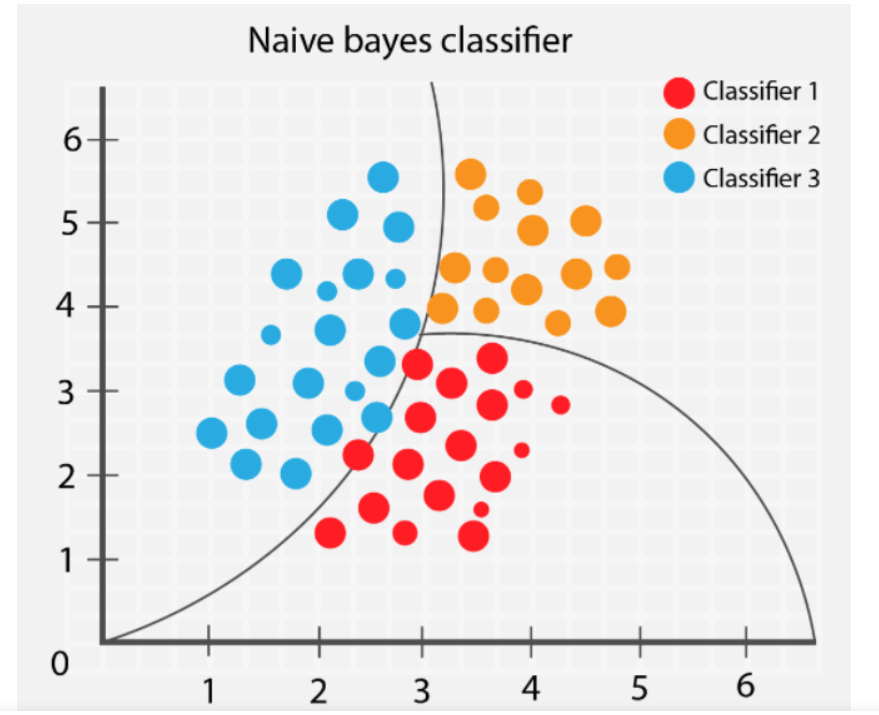

## Naive Bayes

In [165]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [167]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[116  61   4   0   0   0   0   0   0   0   0   2   0]
 [ 10 405   5   0   1   6   0   0   0   0   4   4   0]
 [  0   5 510   0   0   1   0   1   0   0   0   0   0]
 [  0   1   3  83 141   0   2   0   0   0   1   2   0]
 [  0   0   2 149  76   1   0   0   0   0   2   4   0]
 [  0   2   0   0   0 976  10   0   0   0   0   0   0]
 [  1   0   0   0   0  51 659   0   0   0   0   0   0]
 [  0   0   2   1   0   1   0  77   1   1   3   1   0]
 [  1   0   0   0   1   6   1   0   2   1 221   7   0]
 [  1   2   6   0   0   4   3   0   0  66   0   1   0]
 [  1   1   0   0   0  10   1   0  24   2 253  10   0]
 [  0   2   1   9  15   5   0   1   1   0   4 246   1]
 [  0   1   0   0   0   0   0   0   0   0   0   1  56]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.89      0.63      0.74       183
             Akıllı Saat       0.84      0.93      0.89       435
             CepTelefonu       0.96      0.99      0.97       517
D

In [168]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.812834
test_precision-neg    0.931724
test_recall-neg       0.991649
test_f1-neg           0.960707
dtype: float64

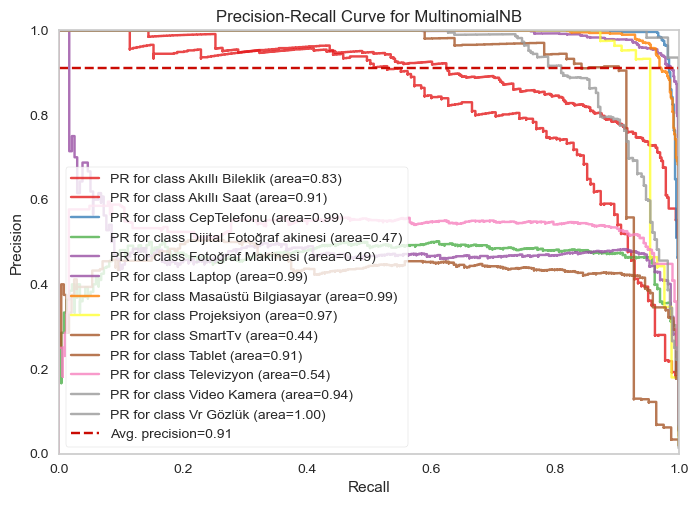

In [170]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [171]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
nb_tfidf_AP_neg = viz.score_["Laptop"]

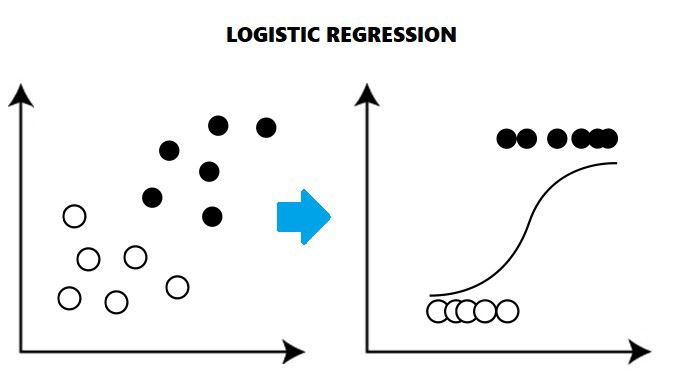

## Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [176]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[133  42   4   0   0   0   0   0   0   0   1   3   0]
 [ 12 404   2   0   0   0   0   0   0   0   6  11   0]
 [  0   5 508   0   0   1   0   0   0   0   0   3   0]
 [  0   0   0  73 150   0   0   0   0   0   1   9   0]
 [  0   0   0 146  76   0   0   0   0   0   2  10   0]
 [  0   1   0   0   0 971  15   0   0   0   0   1   0]
 [  1   0   0   0   0  35 674   0   0   0   0   1   0]
 [  0   1   0   1   0   1   0  80   0   0   2   2   0]
 [  0   0   0   0   1   0   0   0  21   1 210   7   0]
 [  0   2   1   1   0   3   1   0   0  73   0   2   0]
 [  0   0   1   0   0   2   0   0  56   2 229  12   0]
 [  0   0   0   8   6   0   1   0   0   0   5 265   0]
 [  2   0   0   0   0   0   0   0   0   0   1   1  54]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.90      0.73      0.80       183
             Akıllı Saat       0.89      0.93      0.91       435
             CepTelefonu       0.98      0.98      0.98       517


In [177]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.818286
test_precision-neg    0.971930
test_recall-neg       0.987604
test_f1-neg           0.979687
dtype: float64

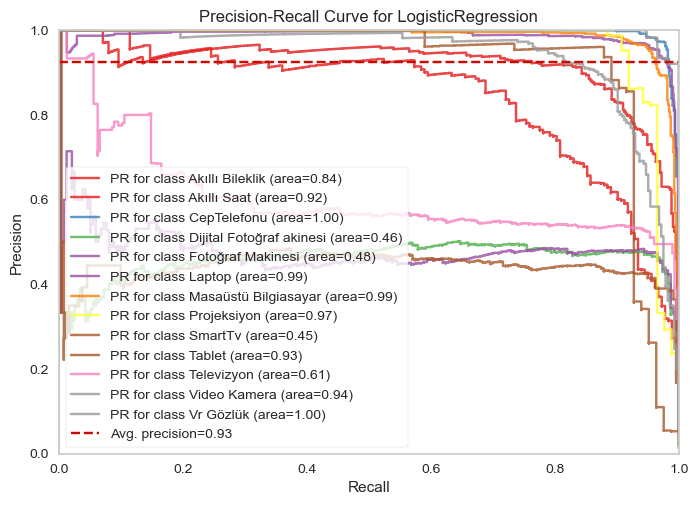

In [179]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [181]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
log_tfidf_AP_neg = viz.score_["Laptop"]

In [182]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [183]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[156  21   0   0   2   0   0   1   1   0   0   1   1]
 [ 34 381   2   0   0   0   0   1   2   0   4  11   0]
 [  2   2 503   0   0   1   0   3   0   3   1   2   0]
 [  0   0   0  74 154   0   0   0   0   0   1   4   0]
 [  0   0   0 149  75   0   0   0   0   0   2   8   0]
 [  0   2   0   0   0 964  18   0   0   1   1   2   0]
 [  1   0   0   0   0  34 673   0   0   0   0   3   0]
 [  1   0   0   1   0   0   0  84   0   0   0   1   0]
 [  0   0   0   0   1   0   0   0 133   1  97   8   0]
 [  0   1   0   1   0   0   1   0   0  79   0   1   0]
 [  0   0   0   0   0   1   0   2 174   2 111  12   0]
 [  0   0   0   8   7   0   0   1   2   0   3 263   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  58]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.80      0.85      0.83       183
             Akıllı Saat       0.94      0.88      0.90       435
             CepTelefonu       1.00      0.97      0.98  

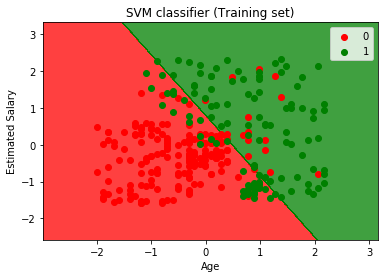

## SVM

In [190]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [192]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[136  42   1   0   0   0   0   1   1   0   0   1   1]
 [ 14 404   1   0   0   0   0   1   1   0  12   2   0]
 [  0   3 512   0   0   0   0   1   0   0   0   1   0]
 [  0   0   0  75 149   0   1   0   0   0   1   7   0]
 [  0   0   1 148  73   0   0   0   0   0   3   9   0]
 [  0   0   0   0   0 976  11   0   0   0   1   0   0]
 [  1   0   0   0   0  31 678   0   0   0   1   0   0]
 [  0   0   0   1   0   1   0  82   0   0   3   0   0]
 [  0   0   0   0   1   0   1   0  23   1 212   2   0]
 [  0   2   0   1   0   2   1   0   0  76   0   1   0]
 [  0   1   1   0   0   1   0   0  67   2 227   3   0]
 [  0   0   0   3   5   0   1   0   1   0   8 266   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  58]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.90      0.74      0.81       183
             Akıllı Saat       0.89      0.93      0.91       435
             CepTelefonu       0.99      0.99      0.99       517


In [194]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.825002
test_precision-neg    0.976536
test_recall-neg       0.986842
test_f1-neg           0.981635
dtype: float64

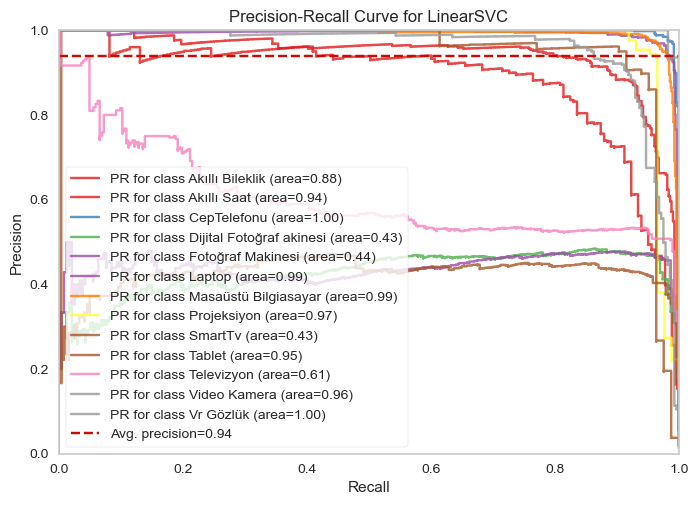

In [195]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [196]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
svc_tfidf_AP_neg = viz.score_["Laptop"]

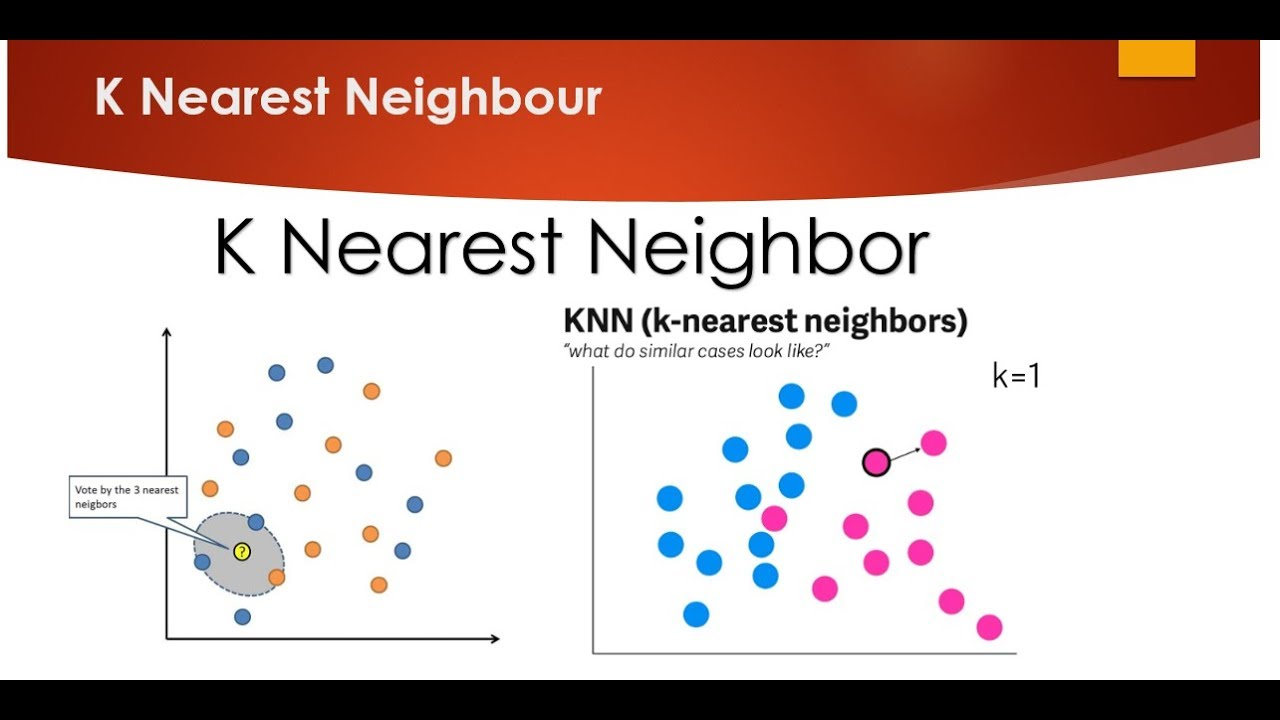

## KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

In [202]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[147  18   2   0   0   0   0   0   8   0   7   1   0]
 [ 25 363   4   0   0   0   0   0  17   0  26   0   0]
 [  0   4 500   0   0   1   1   0   2   0   7   2   0]
 [  0   2   2  80 134   0   0   1   3   0   5   6   0]
 [  0   2   1 159  58   0   0   0   1   0   7   6   0]
 [  0   1   1   0   0 956  24   0   2   0   4   0   0]
 [  0   0   0   0   0  19 682   0   5   0   5   0   0]
 [  0   3   0   0   0   0   0  75   4   0   5   0   0]
 [  1   2   0   0   0   1   1   0  96   1 137   1   0]
 [  0   1   1   0   0   1   0   0   3  66   9   2   0]
 [  1   2   0   0   0   0   0   1 173   1 123   1   0]
 [  3  11   0   6   4   0   1   0  25   0  34 201   0]
 [  0   0   0   0   0   0   0   0   2   0   2   1  53]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.83      0.80      0.82       183
             Akıllı Saat       0.89      0.83      0.86       435
             CepTelefonu       0.98      0.97      0.97       517


In [203]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.780405
test_precision-neg    0.981720
test_recall-neg       0.962555
test_f1-neg           0.972008
dtype: float64

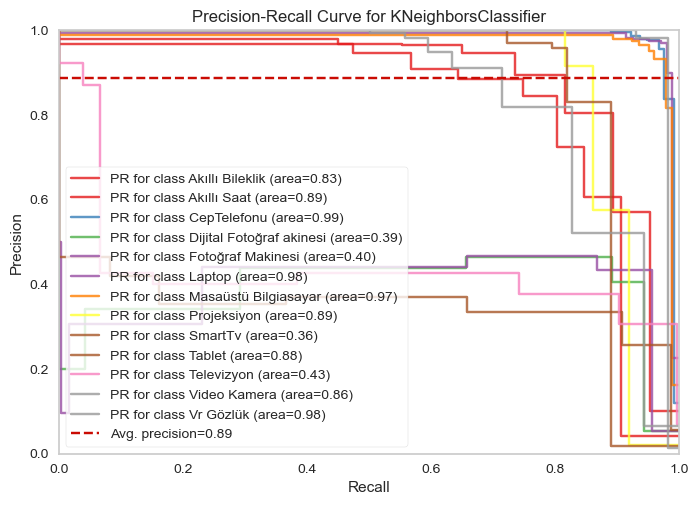

In [204]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [205]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
knn_tfidf_AP_neg = viz.score_["Laptop"]

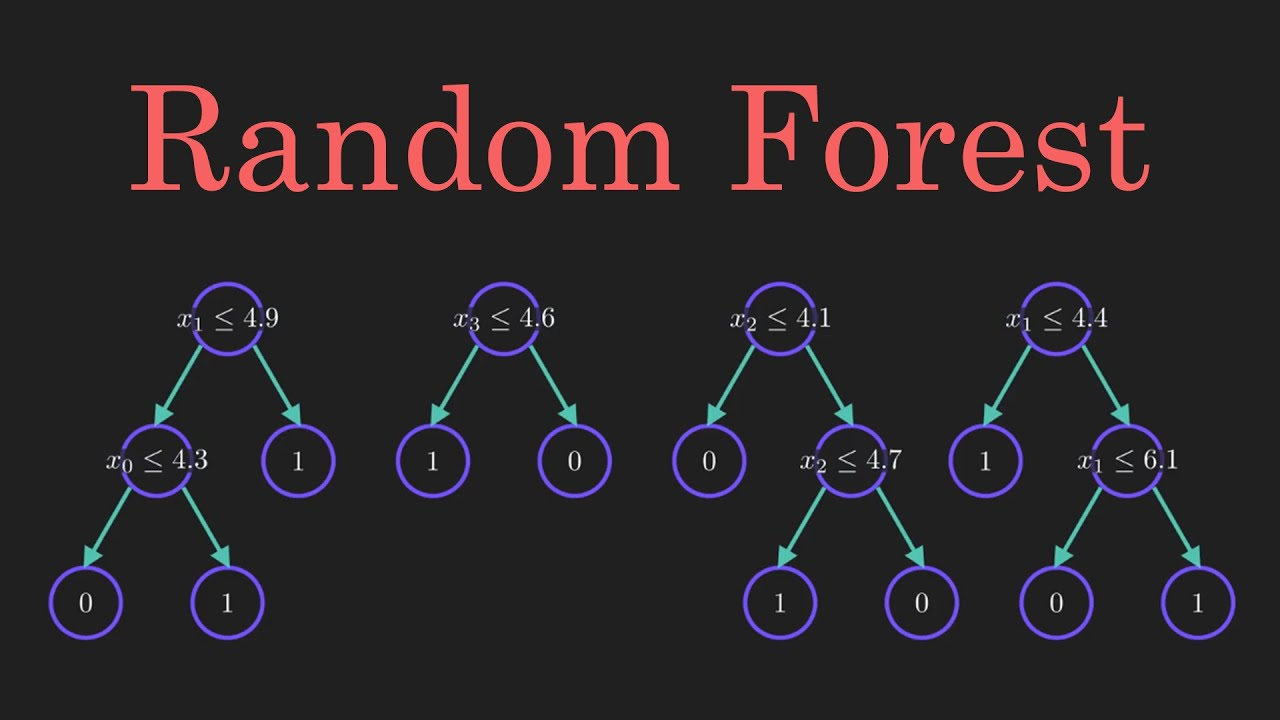

## RandomForest

In [210]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [211]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[145  28   1   1   0   0   0   0   0   0   1   7   0]
 [ 12 395   3   0   0   1   0   0   0   0   2  22   0]
 [  0   1 507   0   0   2   0   0   0   0   0   7   0]
 [  0   0   0  47 166   0   0   0   0   0   1  19   0]
 [  0   0   1 184  36   0   0   0   0   0   2  11   0]
 [  0   0   0   0   0 981   3   0   0   0   1   3   0]
 [  0   0   1   0   0  25 679   0   0   0   2   4   0]
 [  0   0   1   0   0   2   0  78   0   0   3   3   0]
 [  0   0   0   0   0   0   0   0  22   1 190  27   0]
 [  0   1   1   0   0   1   1   0   0  74   0   5   0]
 [  0   1   1   0   0   1   1   0 126   1 138  33   0]
 [  0   1   0   7   3   0   0   0   0   0   4 269   1]
 [  1   1   0   0   0   0   0   0   0   0   0   2  54]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.92      0.79      0.85       183
             Akıllı Saat       0.92      0.91      0.92       435
             CepTelefonu       0.98      0.98      0.98       517
D

In [220]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.798427
test_precision-neg    0.975456
test_recall-neg       0.992916
test_f1-neg           0.984094
dtype: float64

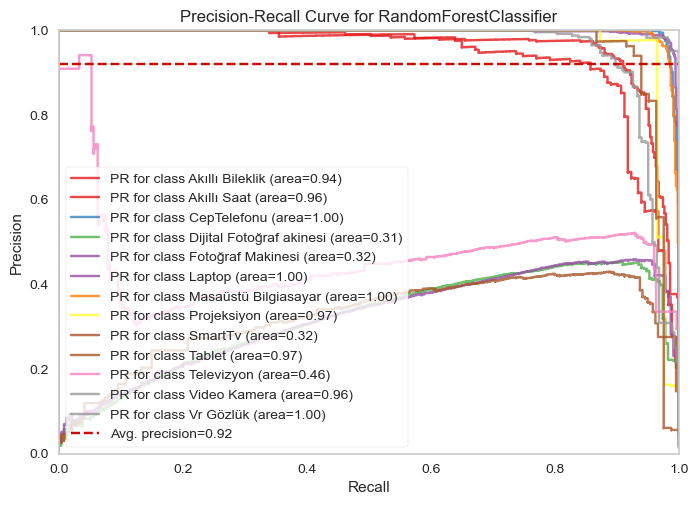

In [221]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [223]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
rf_tfidf_AP_neg = viz.score_["Laptop"]

In [226]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [227]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[130  40   0   1   0   0   0   1   0   0   0  10   1]
 [ 12 386   3   0   0   0   0   1   1   2   0  30   0]
 [  0   5 493   0   0   1   1   1   0   2   0  14   0]
 [  0   0   0  64 141   0   0   0   0   0   0  28   0]
 [  0   0   2 174  36   0   0   0   0   0   1  21   0]
 [  0   0   0   0   0 939  29   0   1   1   0  18   0]
 [  0   0   0   0   0  37 661   0   0   0   0  13   0]
 [  0   1   0   0   0   1   0  80   0   0   1   4   0]
 [  1   0   0   0   1   1   0   1 124   1  62  49   0]
 [  0   0   1   1   0   0   1   0   0  73   1   6   0]
 [  1   0   1   2   0   1   2   0 185   2  64  44   0]
 [  0   0   0   8   6   0   0   4   0   0   2 264   1]
 [  0   0   0   0   0   0   0   0   0   0   0   1  57]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.90      0.71      0.80       183
             Akıllı Saat       0.89      0.89      0.89       435
             CepTelefonu       0.99      0.95      0.97   

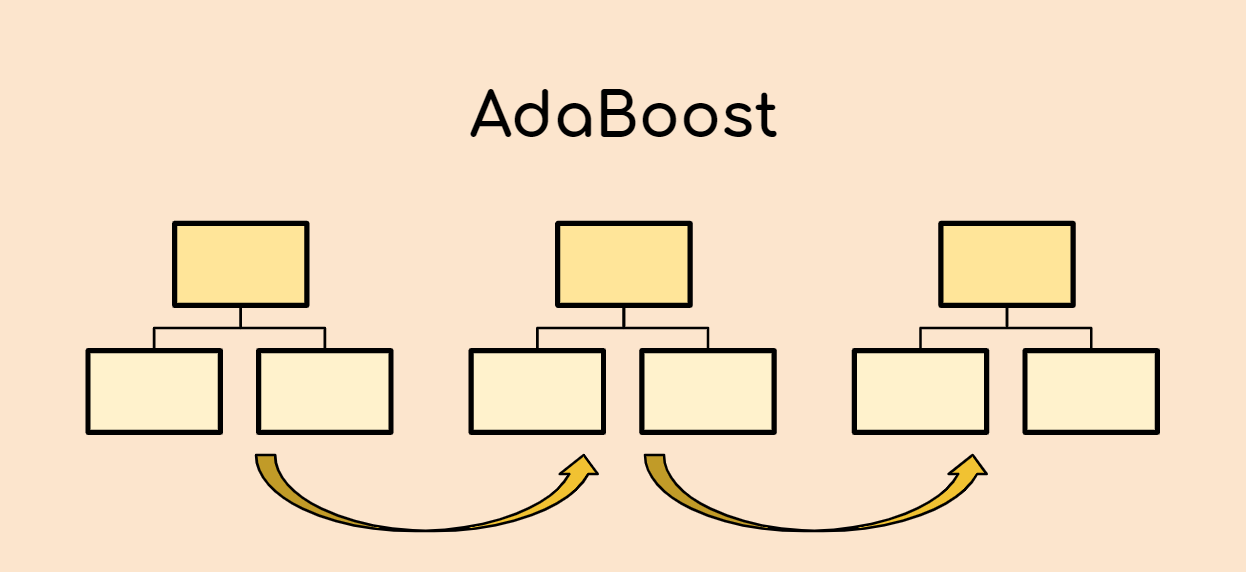

## Ada Boost

In [233]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [234]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[106  68   0   0   0   0   0   0   0   1   7   0   1]
 [ 21 372   0   0   0   0   0   0   0   0  42   0   0]
 [  4   1 344   0   0 144   0   2   0   1  21   0   0]
 [  1   1   2 156  34   1   0   0   0   0  18  20   0]
 [  0   1   3 163  29   1   0   0   0   0  17  20   0]
 [  0   1   0   0   0 950   6   0   0   0  28   2   1]
 [  0   0   0   0   0 263 415   0   0  10  23   0   0]
 [  1   0   0   0   0   0   0  74   0   0   8   4   0]
 [  0   0   0   0   0   1   0   0   0   1 236   2   0]
 [  0   2   0   0   0   1   1   0   0  76   2   1   0]
 [  1   0   0   0   0   1   1   0   0   2 293   4   0]
 [  0   0   2  11   0   0   0   2   1   3  51 215   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3  55]]
Test_Set
                          precision    recall  f1-score   support

         Akıllı Bileklik       0.79      0.58      0.67       183
             Akıllı Saat       0.83      0.86      0.84       435
             CepTelefonu       0.98      0.67      0.79       517


In [235]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.690923
test_precision-neg    0.784027
test_recall-neg       0.853789
test_f1-neg           0.813980
dtype: float64

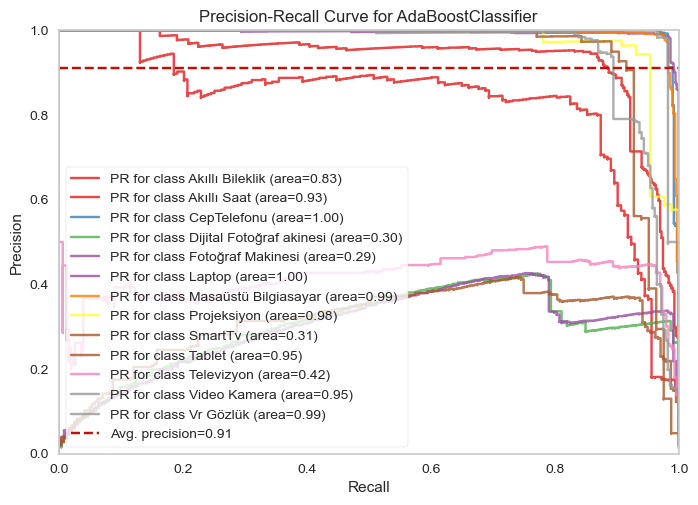

In [236]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [237]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["Laptop"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["Laptop"], average = None)
ada_tfidf_AP_neg = viz.score_["Laptop"]

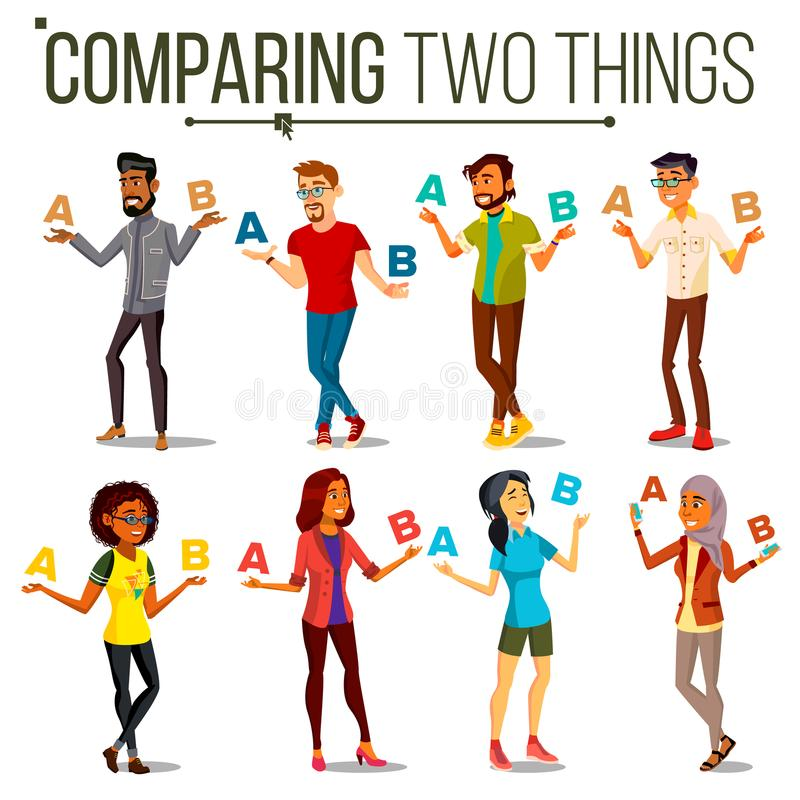

## Compare Scoring

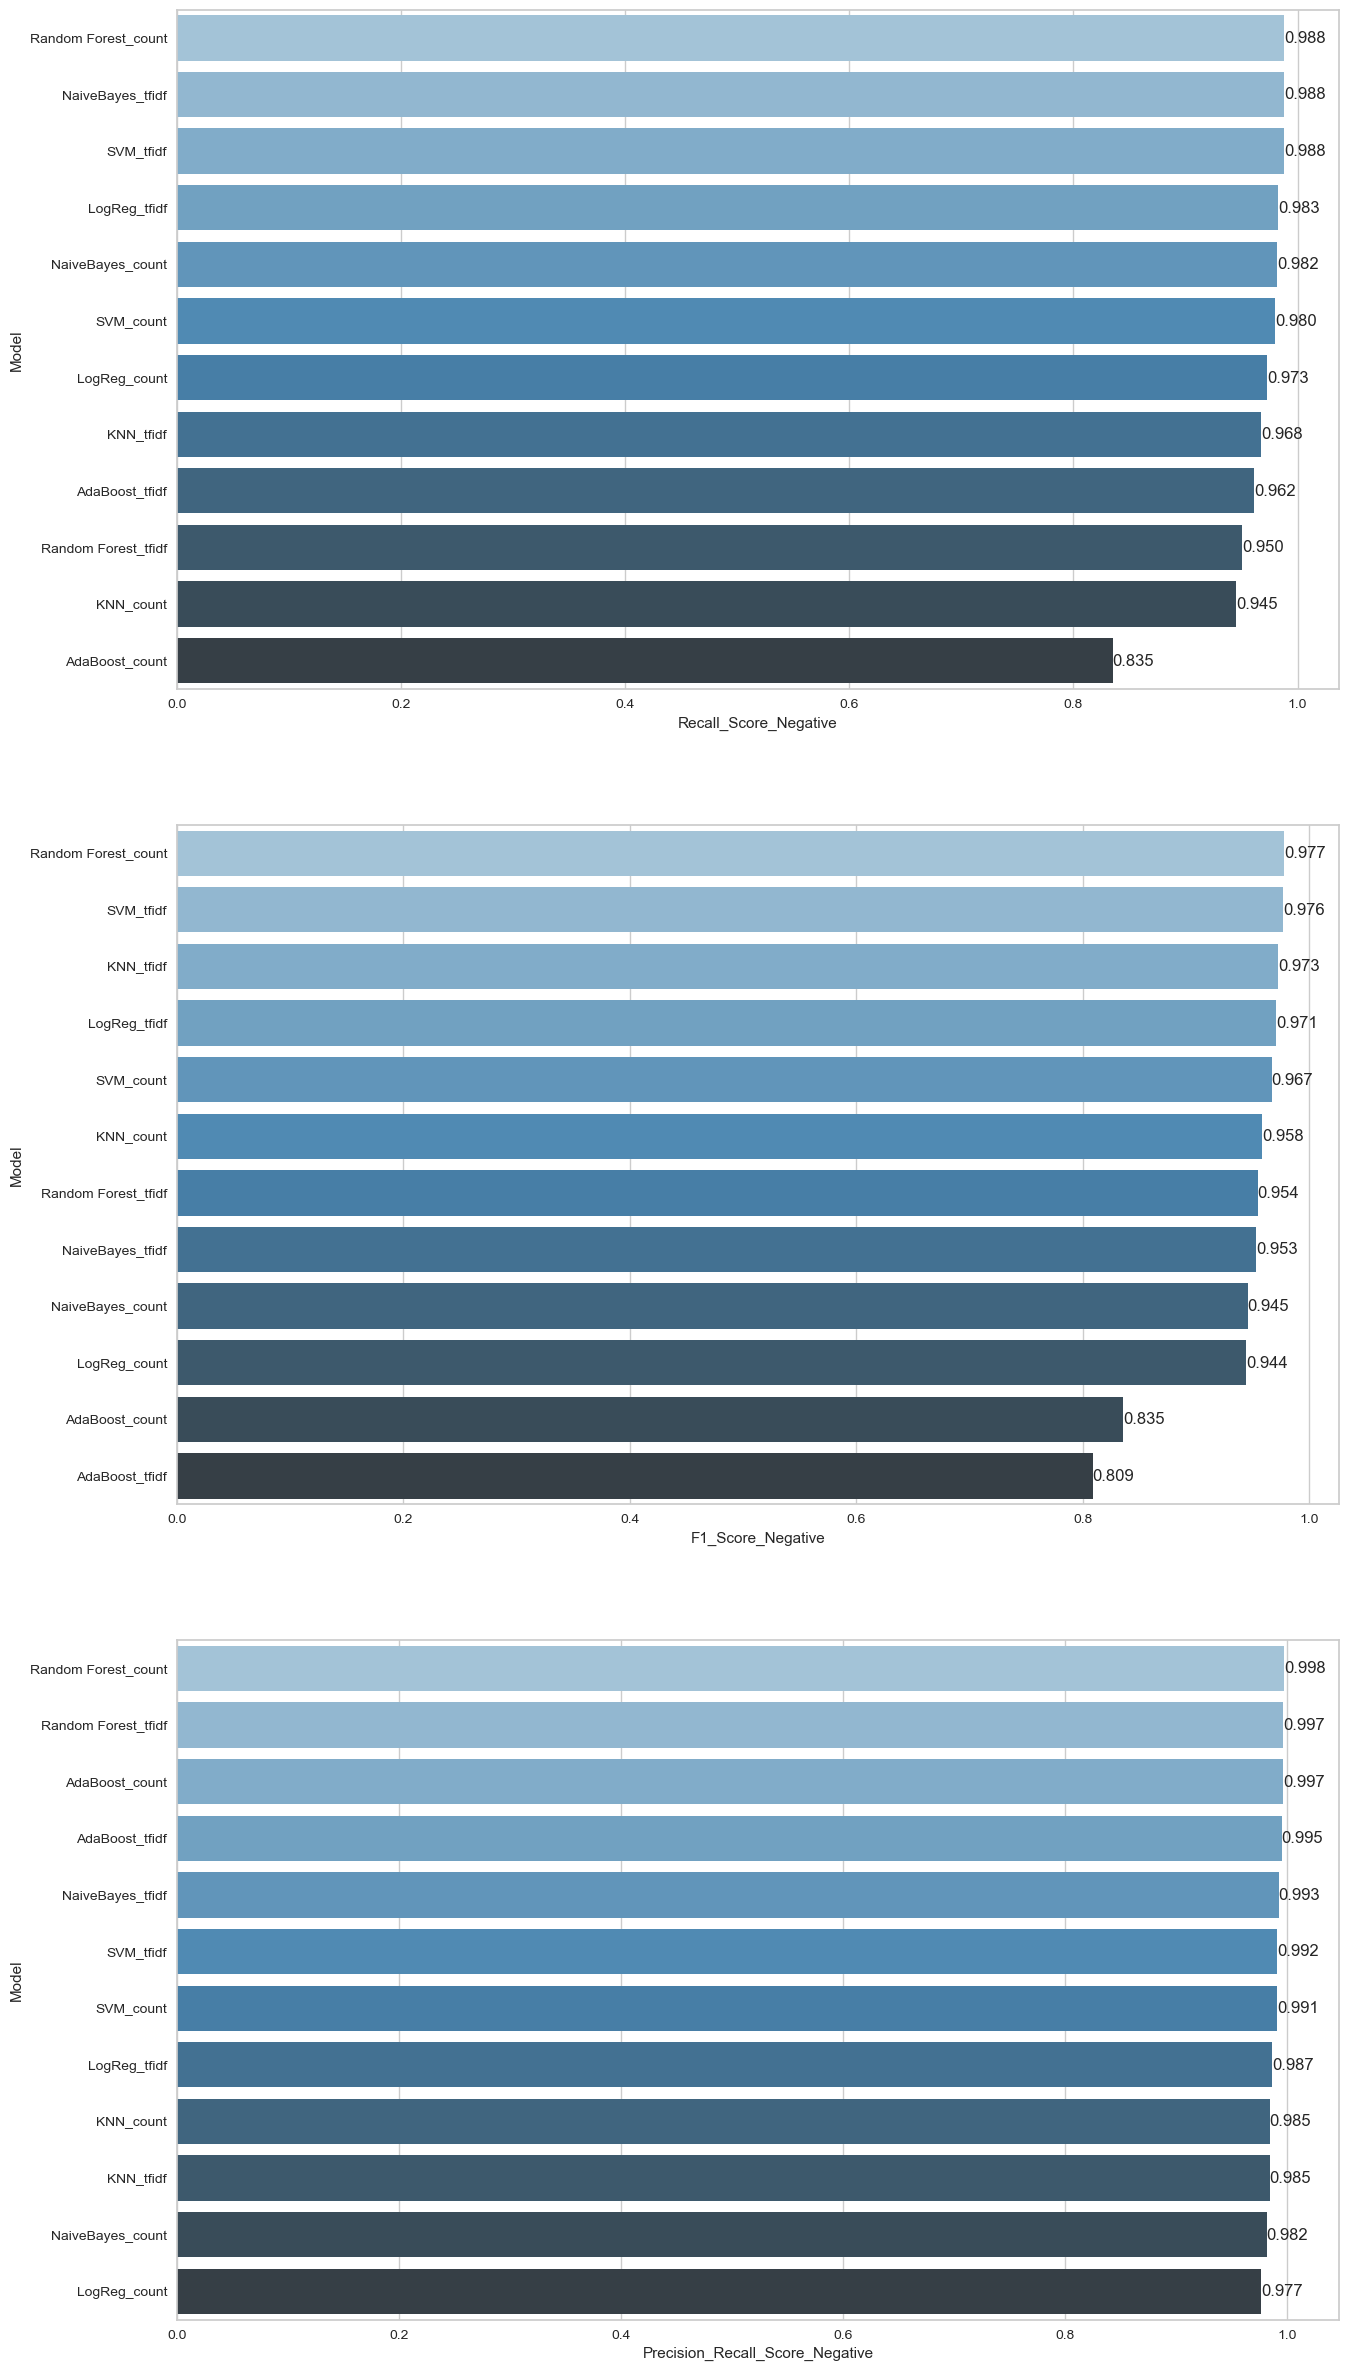

In [244]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

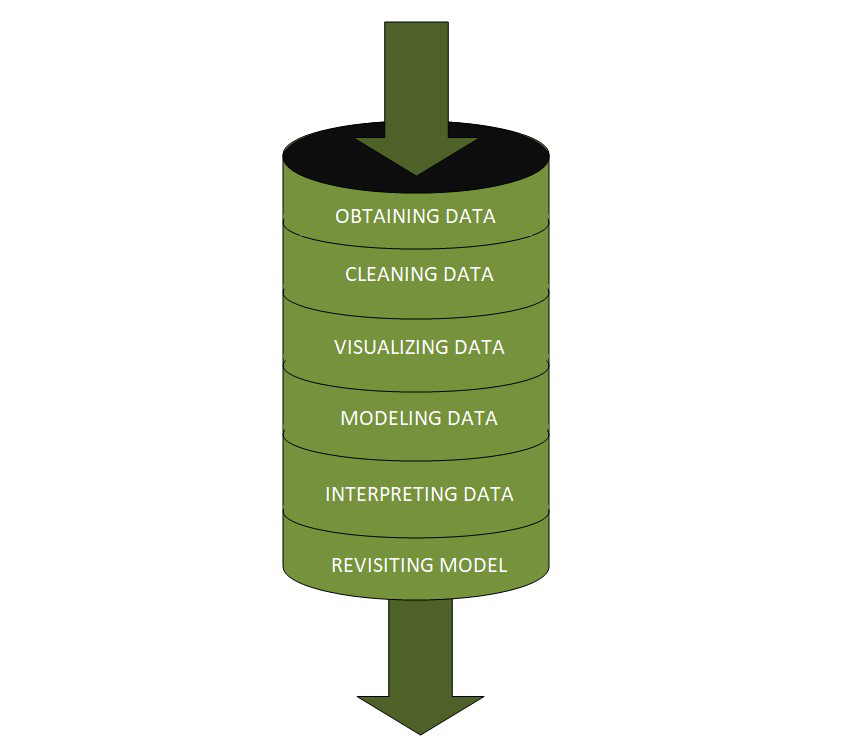

## For New Category, prediction with pipeline


In [246]:
from sklearn.pipeline import Pipeline

Bu kod, scikit-learn kütüphanesini kullanarak bir veri işleme ve sınıflandırma boru hattı (pipeline) oluşturur. Boru hattı, metin madenciliği veya metin sınıflandırma gibi uygulamalarda yaygın olarak kullanılır. Boru hattı, veri işleme ve modelleme adımlarını birleştirir ve kolayca tekrar kullanılabilir hale getirir.

Bu özel boru hattı (Pipeline) iki temel adıma sahiptir:

TfidfVectorizer: Metin belgelerini TF-IDF (Term Frequency-Inverse Document Frequency) vektörlerine dönüştüren bir vektörleştirici. preprocessor=cleaning ile metin verilerine önişleme yapılmasını sağlar ve min_df=3 ile en az 3 belgede geçen terimleri kullanır.

LogisticRegression: Sınıflandırma modeli olarak lojistik regresyon kullanır. C=0.4 ile ceza terimi (regülarizasyon parametresi) ayarlanmış ve max_iter=1000 ile maksimum iterasyon sayısı sınırlanmıştır.


In [248]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),('log',LogisticRegression(C=0.4, max_iter=1000))])


Bu kod, Pipeline sınıfını kullanarak bir veri işleme ve modelleme boru hattı oluşturur. Pipeline, bir dizi adımdan oluşan bir boru hattıdır ve her adım sırasıyla veriyi dönüştürür veya modele uygular.

Bu belirli boru hattı iki adımdan oluşur:

TfidfVectorizer: Metin verilerini sayısal vektörlere dönüştürmek için kullanılan bir vektörleştirici (özellik çıkarma) adımıdır. TfidfVectorizer sınıfı, metinleri TF-IDF (Terim Frekansı-Terim Ters Belge Frekansı) değerlerine dönüştürür. preprocessor=cleaning parametresi, metin verilerinin önişleme işlemleri için cleaning adlı bir önişleme işlevini belirtir. min_df=3 parametresi, en az 3 belgede geçen terimlerin kullanılmasını sağlar.

LogisticRegression: Sınıflandırma modelini temsil eder. Burada LogisticRegression sınıfı kullanılarak bir lojistik regresyon modeli oluşturulur. C=0.4 parametresi, lojistik regresyon modelinin C parametresini belirtir. max_iter=1000 parametresi, maksimum iterasyon sayısını belirtir.

Bu boru hattı, metin verilerini TF-IDF değerlerine dönüştürdükten sonra bu değerleri kullanarak lojistik regresyon modelini eğitir.

max_iter=1000, lojistik regresyon modelinin maksimum iterasyon sayısını belirten bir parametredir. Iterasyonlar, modelin eğitim verilerine uyum sağlamak için tekrarlanan güncelleme adımlarını ifade eder. Lojistik regresyon modeli, maksimum iterasyon sayısına ulaştığında veya yakınsama kriterine göre durduğunda eğitim sürecini sonlandırır.

Bu parametre, modelin ne kadar süre boyunca eğitim yapacağını kontrol etmek için kullanılır. Özellikle büyük veri kümeleri veya karmaşık modellerde, eğitim süreci daha fazla iterasyon gerektirebilir. max_iter değeri, eğitim süresini uzatmak veya kısaltmak için ayarlanabilir. 1000, belirli bir sayıda iterasyon yapılacağını ve ardından eğitimin sonlandırılacağını göstermektedir.

In [252]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x000001C8C0DEEDE0>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

Bu kod, pipe adlı boru hattını veriye uyum sağlamak için kullanır. fit işlemi, boru hattındaki her bir adımı sırayla çalıştırarak veriyi dönüştürür ve modele uygular.

X veri kümesi, eğitim verilerini temsil eder. Bu veriler, metinlerin özellik vektörlerini içermelidir. Önceki adımda belirtildiği gibi, TfidfVectorizer adımı metinleri TF-IDF değerlerine dönüştürür.

y veri kümesi ise ilgili etiketleri içerir. Bu, sınıflandırma probleminde metin örneklerine karşılık gelen doğru sınıf etiketlerini içermelidir.

Bu kod, boru hattını eğitim verilerine uyum sağlamak için kullanılır. Bu işlem, TfidfVectorizer adımını kullanarak metinleri sayısal vektörlere dönüştürür ve ardından LogisticRegression adımında lojistik regresyon modelini eğitir. Model, metinlerin özelliklerini ve ilgili etiketleri kullanarak bir sınıflandırma modeli oluşturur.

In [255]:
category = 'ACER Nitro V15 ANV15-51-57XV i5-13420H 16GB 512GB SSD RTX4050 Freedos 15.6" FHD NH.QNBEY.004'
category = pd.Series(category)
pipe.predict(category)

array(['Laptop'], dtype=object)

In [259]:
category = 'Xiaomi Redmi 13 8 GB RAM 256 GB Siyah Cep Telefonu (Xiaomi Türkiye Garantili)'
category = pd.Series(category)
pipe.predict(category)

array(['CepTelefonu'], dtype=object)

In [261]:
category = 'Xiaomi Redmi Watch 5 Active Silver Akıllı Saat (Xiaomi Türkiye Garantili) Sesli Görüşme Özellikli'
category = pd.Series(category)
pipe.predict(category)

array(['Akıllı Saat'], dtype=object)

In [263]:
category = 'kallow Z10 Sim Kart Girişli Akıllı Çocuk Takip Saati Uzaktan Dinleme Özellikli Türkçe Menü Yeşil'
category = pd.Series(category)
pipe.predict(category)

array(['Akıllı Saat'], dtype=object)

In [265]:
category = 'TCL 55C745 55" 139 Ekran Uydu Alıcılı 4K Ultra HD Google Smart Gaming QLED TV'
category = pd.Series(category)
pipe.predict(category)

array(['Televizyon'], dtype=object)

In [269]:
category = 'Zeiron Tx80 i7-860 16GB Ram 256GB SSD GT730 4GB 24" Curved Oyuncu Masaüstü Bilgisayar'
category = pd.Series(category)
pipe.predict(category)

array(['Masaüstü Bilgiasayar'], dtype=object)

In [271]:
category = 'Honor Pad X9 4gb 128gb Wifi 11.5'' Uzay Gri Tablet'
category = pd.Series(category)
pipe.predict(category)

array(['Tablet'], dtype=object)

## Collect Words and Counting words

In [273]:
category = cleaning_text
category

0               lemci ram ssd fhd freedos laptop kmr grisi
1               nirvana intel core gb ram nvme ssd freedos
2                             vostro gb gb ssd fhd freedos
3                excalibur intel core ram nvme ssd freedos
4             nirvana intel celeron ram ssd window home hd
                               ...                        
21774    sanal gereklik gzl kulaklkl kablosuz bluetooh ...
21775    antiradyasyon anti blue light teknoloji gzl gz...
21776    tm telefonlar uyumlu vr sanal gereklik gzl kum...
21777           tm telefonlar uyumlu vr sanal gereklik gzl
21778                    shinecon sanal gereklik gzl siyah
Name: product_Info, Length: 21779, dtype: object

In [275]:
all_words = " ".join(category)

In [277]:
all_words[:100]

'lemci ram ssd fhd freedos laptop kmr grisi nirvana intel core gb ram nvme ssd freedos vostro gb gb s'

In [279]:
counter = Counter(word_tokenize(all_words))

In [280]:
counter.most_common()

[('ssd', 6730),
 ('gb', 5540),
 ('intel', 2786),
 ('fhd', 2689),
 ('akll', 2675),
 ('freedos', 2630),
 ('ram', 2593),
 ('core', 2548),
 ('ekran', 2389),
 ('hd', 2333),
 ('bilgisayar', 2169),
 ('pro', 2136),
 ('saat', 2114),
 ('smart', 2066),
 ('tv', 2027),
 ('mini', 1947),
 ('masast', 1887),
 ('fotoraf', 1881),
 ('kamera', 1569),
 ('garantili', 1523),
 ('ultra', 1508),
 ('watch', 1445),
 ('led', 1403),
 ('iphone', 1259),
 ('uyumlu', 1241),
 ('makinesi', 1212),
 ('uydu', 1165),
 ('siyah', 1143),
 ('android', 1139),
 ('window', 1112),
 ('alcl', 1093),
 ('instax', 1082),
 ('cep', 1044),
 ('telefonu', 1033),
 ('rtx', 1026),
 ('trkiye', 973),
 ('yenilenmi', 915),
 ('tb', 901),
 ('ryzen', 761),
 ('dijital', 752),
 ('victus', 736),
 ('tanabilir', 716),
 ('seti', 688),
 ('hz', 683),
 ('amd', 675),
 ('galaxy', 656),
 ('anta', 646),
 ('beyaz', 627),
 ('mavi', 624),
 ('hdd', 622),
 ('ocuk', 601),
 ('pembe', 576),
 ('pc', 571),
 ('thinkcentre', 566),
 ('abra', 562),
 ('ip', 545),
 ('home', 537),
 

In [289]:
for i in counter.most_common():
    if "cep" == i[0]:
        print(i)

('cep', 1044)


In [291]:
for i in counter.most_common():
    if "intel" == i[0]:
        print(i)

('intel', 2786)


In [293]:
for i in counter.most_common():
    if "tv" == i[0]:
        print(i)

('tv', 2027)



Bu kod parçası, bir counter nesnesinde en sık geçen öğeleri döngüyle kontrol eder ve "like" kelimesini arar. Eğer "like" kelimesi bulunursa, bu kelimenin frekansını ve sayısını ekrana yazdırır.

counter.most_common() metodu, counter nesnesindeki öğeleri en çoktan en aza doğru sıralı bir şekilde döndürür. Her bir öğe bir demet olarak döner ve demetin ilk elemanı kelimeyi, ikinci elemanı ise kelimenin frekansını temsil eder.

Eğer "like" kelimesi counter nesnesinde geçiyorsa, bu kod parçası ilgili öğenin frekansını ve sayısını ekrana yazdırır.

In [299]:
counter = 0
for i,j in enumerate(category):
    if "ssd" in j and "intel" in j and y[i]=="Laptop":
        counter += 1
print(counter)      

1700


Bu kod parçası, tweets adlı bir liste üzerinde döngü oluşturur. Her bir tweet için "like" kelimesi ve "didnt" kelimesinin içerisinde geçtiğini ve aynı zamanda ilgili tweetin sınıfının ("negative" olarak belirtilmiş) negatif olduğunu kontrol eder. Eğer bu koşullar sağlanıyorsa, counter değişkenini bir artırır.

Sonuç olarak, bu kod parçası "like" kelimesi ve "didnt" kelimesinin içeren ve sınıfı "negative" olan tweetlerin sayısını counter değişkeni aracılığıyla hesaplar ve ekrana yazdırır.

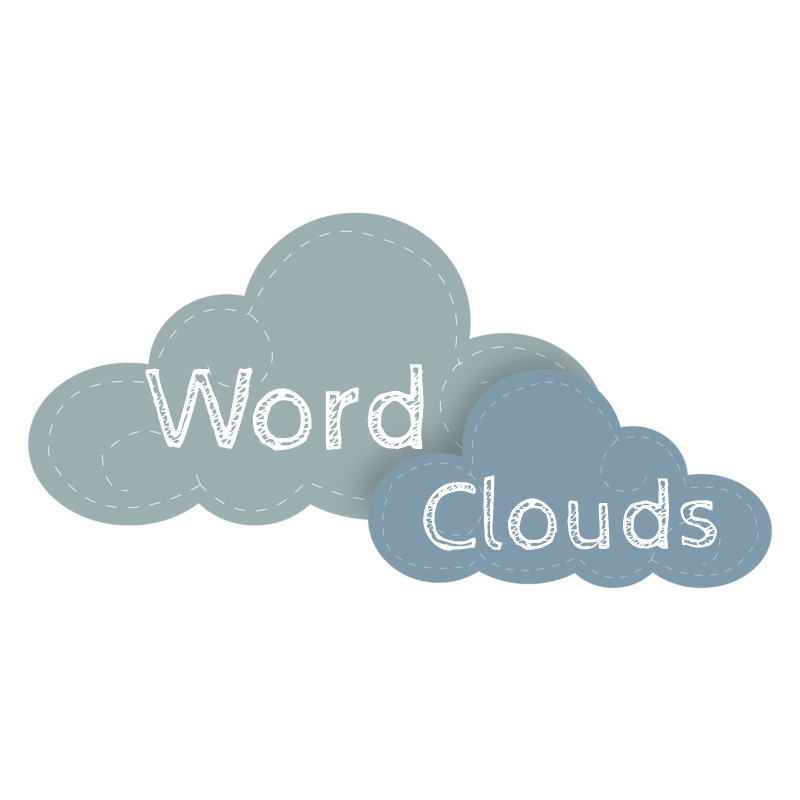

## WordCloud - Repetition of Words

## Collect Words

In [315]:
all_words = " ".join(category)

In [317]:
all_words[:100]

'lemci ram ssd fhd freedos laptop kmr grisi nirvana intel core gb ram nvme ssd freedos vostro gb gb s'

## Create Word Cloud

In [319]:
!pip install wordcloud

In [320]:
from wordcloud import WordCloud

In [321]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [322]:
worldcloud.generate(all_words)

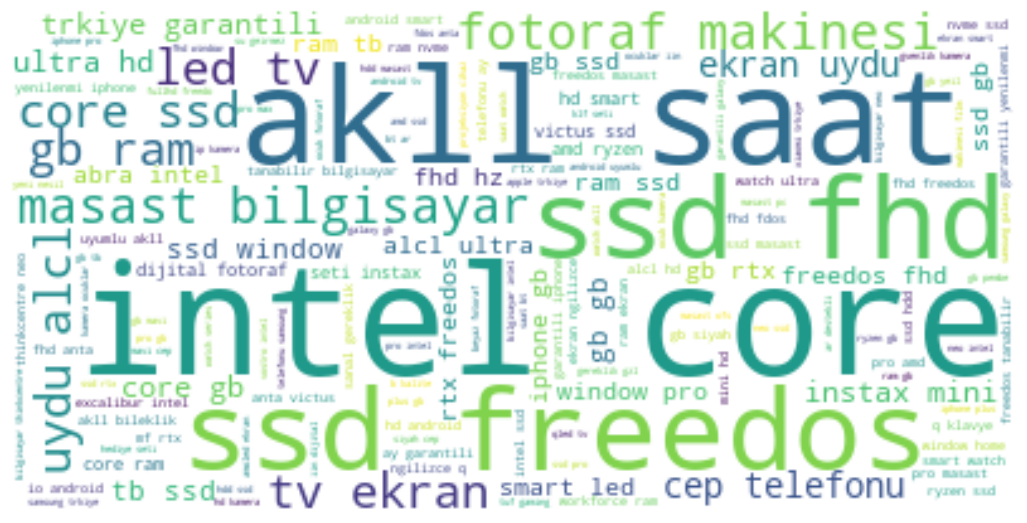

In [329]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()